In [3]:
##Cell 1: Importing Libraries and Setting Parameters
import numpy as np
import matplotlib.pyplot as plt

# 1. Define Parameters
I_load = 20            # Constant Current Load (Amps)
V_nom = 3.6            # Nominal Voltage (Volts)
Wh_range = np.arange(12, 20.1, 0.1)     # Capacity range (Wh)
R_range = np.arange(0.004, 0.0405, 0.0005) # DCIR range (Ohms)
Wh_Max = Wh_range.max
# Thermal Parameters
m_cell = 0.071         # Mass (kg) -> 71g
c_p = 900              # Specific Heat Capacity (J/kg*K)
T_ambient = 25         # Starting Ambient Temp (deg C)

# 2. Create Grid & Calculate Physics
R_grid, Wh_grid = np.meshgrid(R_range, Wh_range)

# A. Runtime Calculation (Hours)
t_run_hours = Wh_grid / (V_nom * I_load)

# B. Energy Loss Calculation (Resistive Heating)
P_loss = (I_load**2) * R_grid       # Watts
E_loss_Wh = P_loss * t_run_hours    # Watt-Hours lost to heat

# C. Usable Energy Calculation
E_usable = Wh_grid - E_loss_Wh

# D. Thermal Calculation (Temperature Rise)
Q_joules = E_loss_Wh * 3600
Delta_T = Q_joules / (m_cell * c_p)
T_final = T_ambient + Delta_T

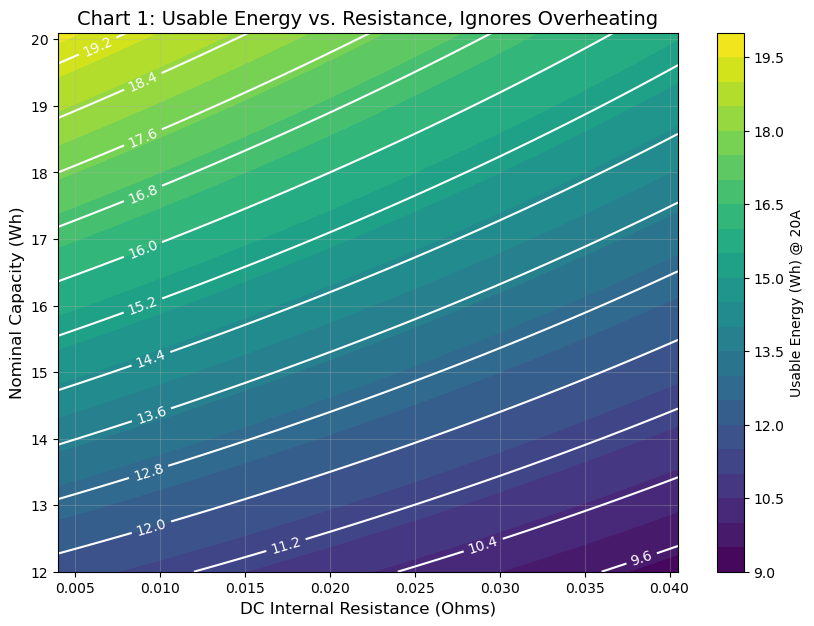

In [11]:
##Cell 2: Plot 1 - Usable Energy, Ignores Overheating
plt.figure(figsize=(10, 7))

cp = plt.contourf(R_grid, Wh_grid, E_usable, 20, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.set_label(f'Usable Energy (Wh) @ {I_load}A')

# Lines of Equivalency
lines = plt.contour(R_grid, Wh_grid, E_usable, 15, colors='white', linewidths=1.5)
plt.clabel(lines, inline=True, fontsize=10, fmt='%1.1f')

plt.title('Chart 1: Usable Energy vs. Resistance, Ignores Overheating', fontsize=14)
plt.xlabel('DC Internal Resistance (Ohms)', fontsize=12)
plt.ylabel('Nominal Capacity (Wh)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

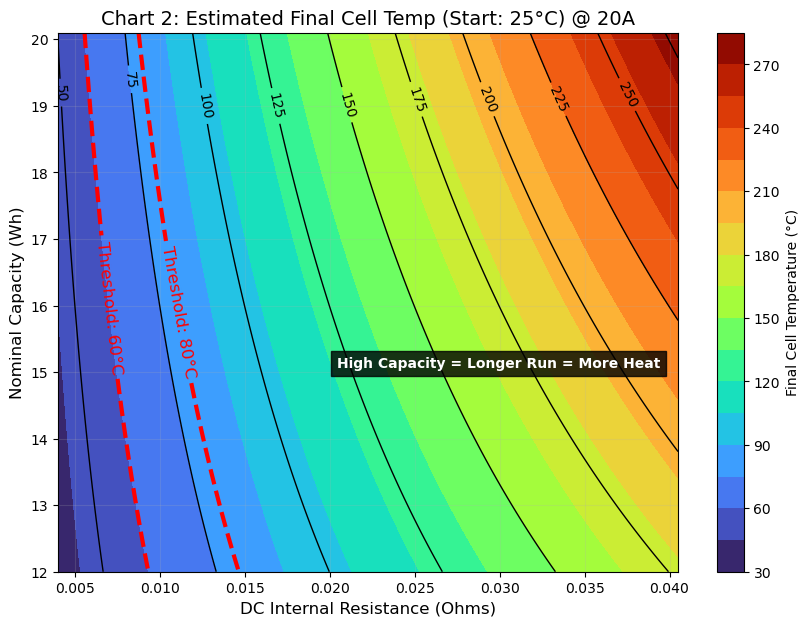

In [ ]:
plt.figure(figsize=(10, 7))

# Contour Plot using 'turbo' or 'inferno' to highlight heat
cp2 = plt.contourf(R_grid, Wh_grid, T_final, 20, cmap='turbo')
cbar2 = plt.colorbar(cp2)
cbar2.set_label('Final Cell Temperature (°C)')

# Lines of Constant Temperature
lines2 = plt.contour(R_grid, Wh_grid, T_final, 10, colors='black', linewidths=1)
plt.clabel(lines2, inline=True, fontsize=10, fmt='%d')

# Safety Threshold Lines (60C and 80C)
safe_lines = plt.contour(R_grid, Wh_grid, T_final, levels=[60, 80], colors='red', linestyles='--', linewidths=3)
plt.clabel(safe_lines, inline=True, fontsize=12, fmt='Threshold: %d°C')

plt.title(f'Chart 2: Estimated Final Cell Temp (Start: {T_ambient}°C) @ {I_load}A', fontsize=14)
plt.xlabel('DC Internal Resistance (Ohms)', fontsize=12)
plt.ylabel('Nominal Capacity (Wh)', fontsize=12)

# Annotation similar to the MATLAB text() function
plt.text(R_range.min()*5.1, Wh_range.max()*0.75, 'High Capacity = Longer Run = More Heat', 
         color='white', fontweight='bold', bbox=dict(facecolor='black', alpha=0.8))

plt.grid(True, alpha=0.2)
plt.show()

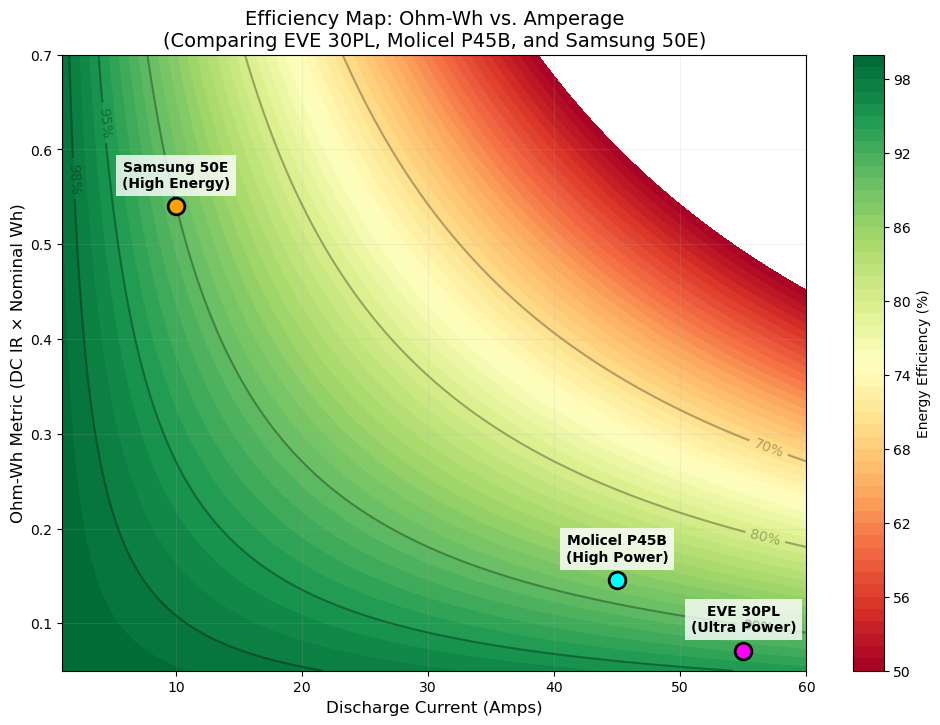

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define Cell Profiles (DC IR values)
# Molicel P45B
p45b_wh = 16.2
p45b_dc_ir = 0.009
p45b_ohm_wh = p45b_dc_ir * p45b_wh

# Samsung 50E
s50e_wh = 18.0
s50e_dc_ir = 0.030
s50e_ohm_wh = s50e_dc_ir * s50e_wh

# EVE 30PL (New)
eve30pl_wh = 10.95
eve30pl_dc_ir = 0.0065
eve30pl_ohm_wh = eve30pl_dc_ir * eve30pl_wh

# 2. Setup the Grid
amps = np.linspace(1, 60, 200) # Extended to 60A
ohm_wh_range = np.linspace(0.05, 0.7, 200) # Focused on the 0.05 to 0.7 range
A_grid, OW_grid = np.meshgrid(amps, ohm_wh_range)

# 3. Efficiency Calculation
V_nom = 3.6
# Reference Energy (average of the group) to anchor the efficiency gradient
Wh_ref = (p45b_wh + s50e_wh + eve30pl_wh) / 3 
efficiency = 1 - (A_grid * (OW_grid / Wh_ref)) / V_nom
efficiency = np.clip(efficiency, 0, 1)

# 4. Plotting
plt.figure(figsize=(12, 8))
cp = plt.contourf(A_grid, OW_grid, efficiency * 100, levels=np.arange(50, 101, 1), cmap='RdYlGn')
cbar = plt.colorbar(cp)
cbar.set_label('Energy Efficiency (%)')

# Add threshold lines
lines = plt.contour(A_grid, OW_grid, efficiency * 100, levels=[70, 80, 90, 95, 98], colors='black', alpha=0.3)
plt.clabel(lines, inline=True, fontsize=10, fmt='%d%%')

# Plot Cell Markers
# Samsung 50E at 10A
plt.plot(10, s50e_ohm_wh, 'ko', markersize=12, markerfacecolor='orange', markeredgewidth=2)
plt.text(10, s50e_ohm_wh + 0.02, 'Samsung 50E\n(High Energy)', fontweight='bold', ha='center', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Molicel P45B at 45A
plt.plot(45, p45b_ohm_wh, 'ko', markersize=12, markerfacecolor='cyan', markeredgewidth=2)
plt.text(45, p45b_ohm_wh + 0.02, 'Molicel P45B\n(High Power)', fontweight='bold', ha='center', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# EVE 30PL at 55A
plt.plot(55, eve30pl_ohm_wh, 'ko', markersize=12, markerfacecolor='magenta', markeredgewidth=2)
plt.text(55, eve30pl_ohm_wh + 0.02, 'EVE 30PL\n(Ultra Power)', fontweight='bold', ha='center', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.title('Efficiency Map: Ohm-Wh vs. Amperage\n(Comparing EVE 30PL, Molicel P45B, and Samsung 50E)', fontsize=14)
plt.xlabel('Discharge Current (Amps)', fontsize=12)
plt.ylabel('Ohm-Wh Metric (DC IR × Nominal Wh)', fontsize=12)
plt.grid(True, alpha=0.15)
plt.show()

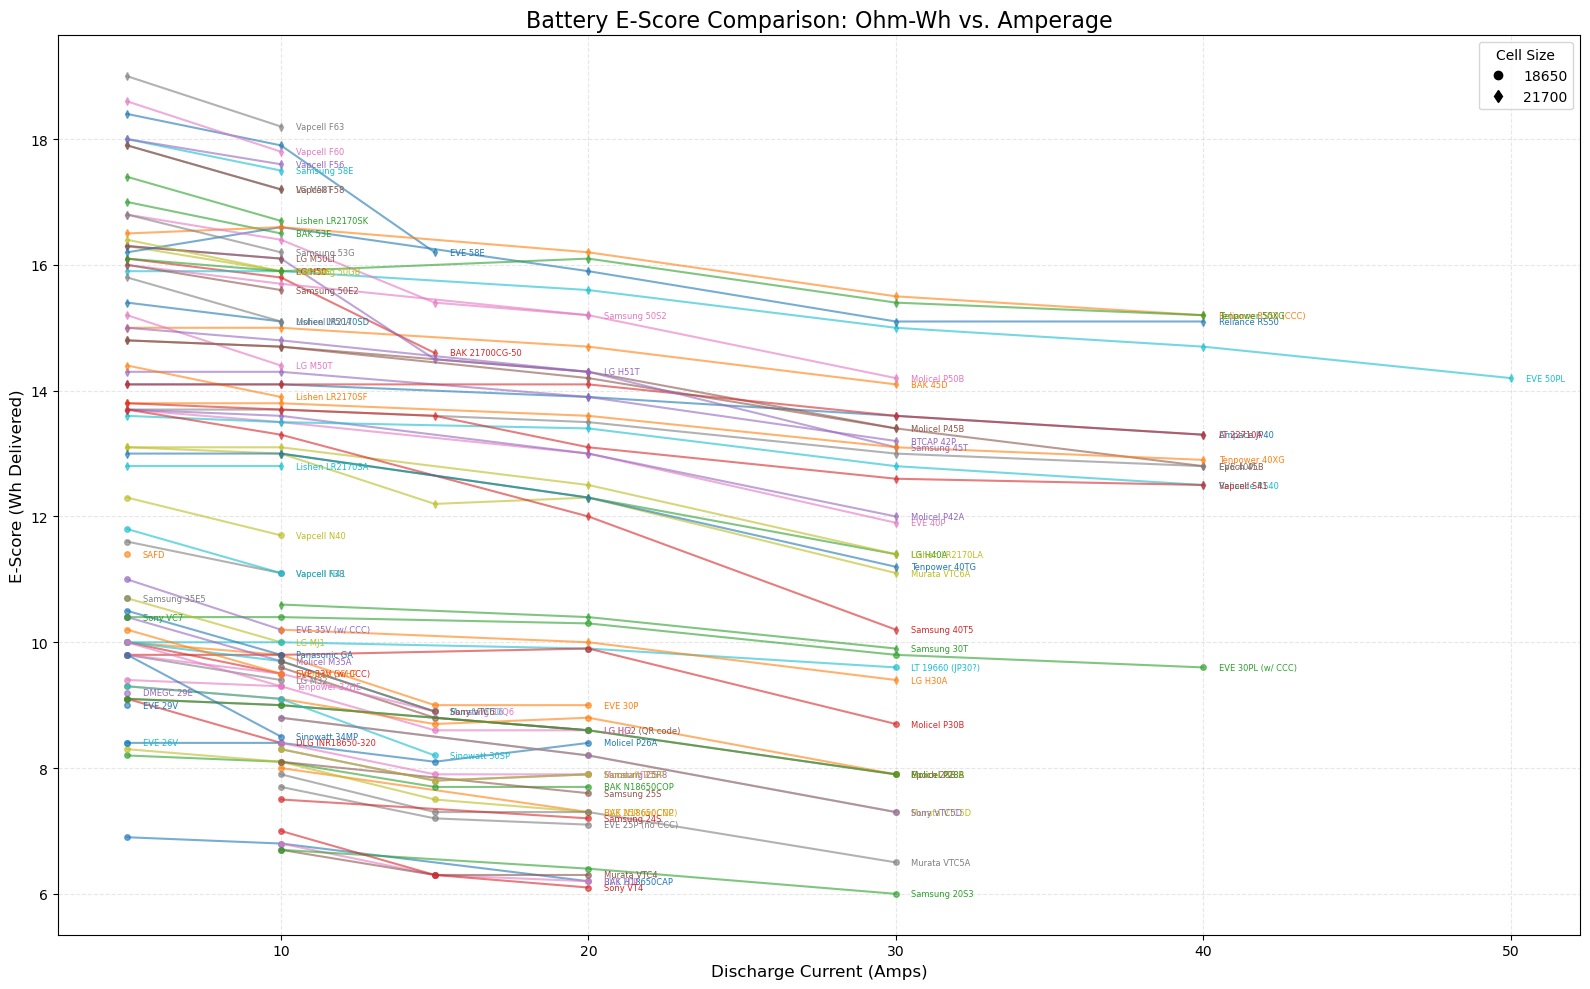

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the data
df = pd.read_csv(r'C:\Pythoning\Data\MoochBatteryDataV1.csv')

# 2. Setup the plot
plt.figure(figsize=(16, 10))
ax = plt.gca()

# Amperage columns to plot (X-axis values)
amp_levels = [5, 10, 15, 20, 30, 40, 50]
amp_cols = ['E-Score 5A', 'E-Score 10A', 'E-Score 15A', 'E-Score 20A', 'E-Score 30A', 'E-Score 40A', 'E-Score 50A']

# Define markers for cell sizes
# 18650 = Circle (o), 21700 = Diamond (d)
marker_map = {18650: 'o', 21700: 'd'}

# 3. Plot each battery
for i, row in df.iterrows():
    # Filter out empty scores for this specific row
    valid_amps = []
    valid_scores = []
    
    for amp, col in zip(amp_levels, amp_cols):
        if pd.notnull(row[col]) and row[col] != '—':
            valid_amps.append(amp)
            valid_scores.append(float(row[col]))
    
    if not valid_amps:
        continue

    # Get cell properties
    size = int(row['Cell Size'])
    marker = marker_map.get(size, 'x')
    ohm_wh = row['Ohm-Wh']
    name = row['Battery Model']

    # Plot line and points
    line, = plt.plot(valid_amps, valid_scores, linestyle='-', marker=marker, 
                     markersize=4, alpha=0.6, label=name)
    
    # Add small label at the end of the line
    plt.text(valid_amps[-1] + 0.5, valid_scores[-1], name, 
             fontsize=6, verticalalignment='center', color=line.get_color())

# 4. Formatting
plt.title('Battery E-Score Comparison: Ohm-Wh vs. Amperage', fontsize=16)
plt.xlabel('Discharge Current (Amps)', fontsize=12)
plt.ylabel('E-Score (Wh Delivered)', fontsize=12)

# Create a custom legend for cell sizes
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='k', label='18650', linestyle='None'),
                   Line2D([0], [0], marker='d', color='k', label='21700', linestyle='None')]
ax.legend(handles=legend_elements, loc='upper right', title="Cell Size")

plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

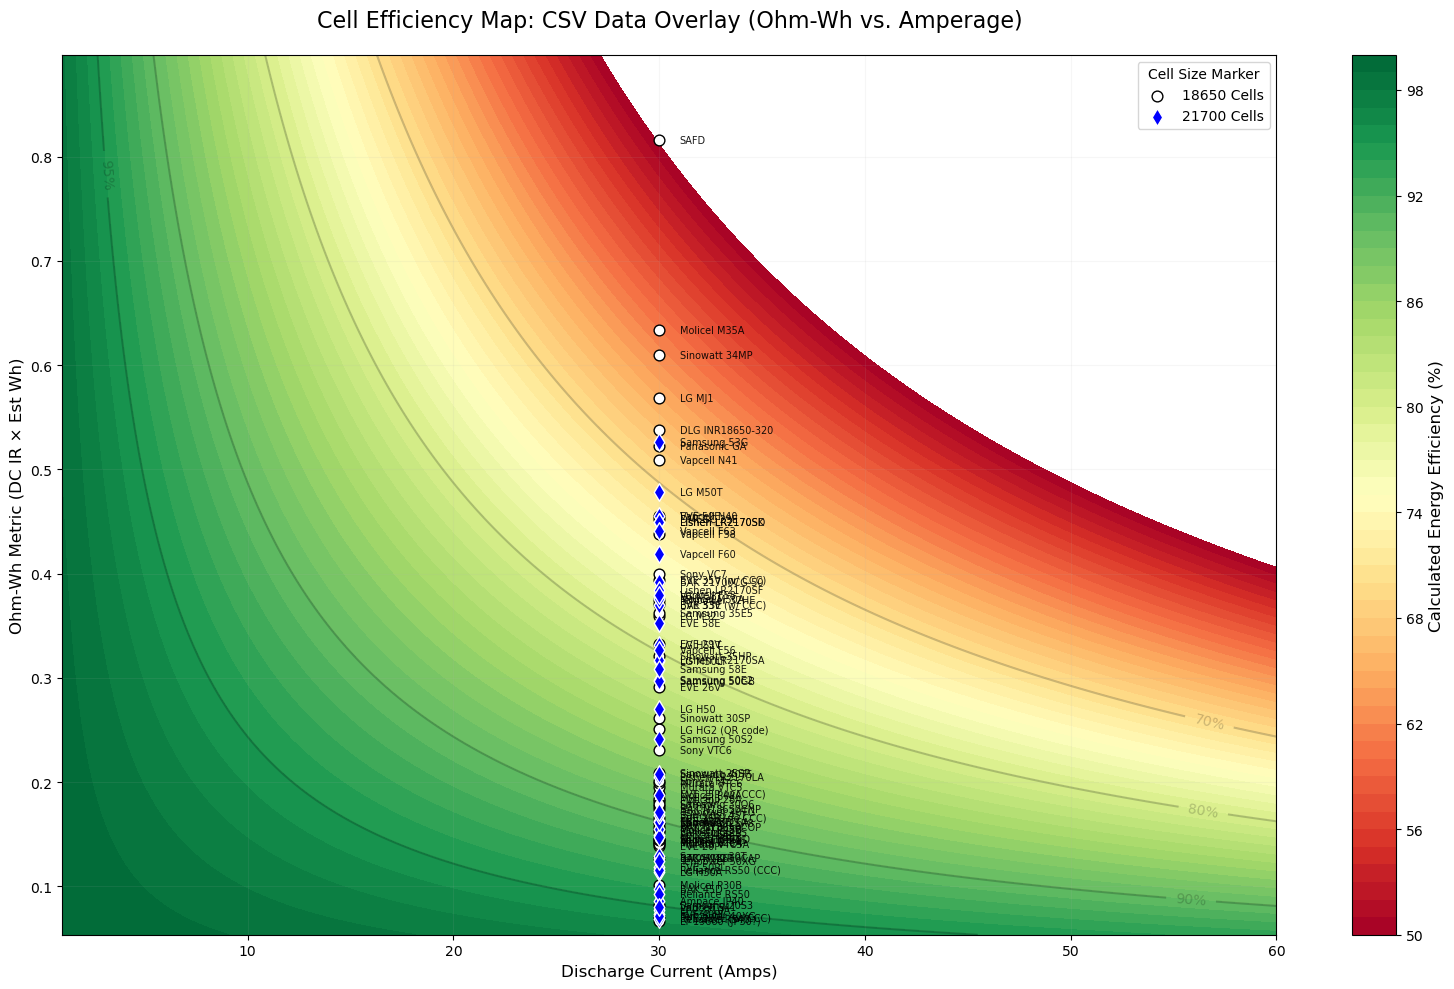

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load your dataset
df = pd.read_csv(r'C:\Pythoning\Data\MoochBatteryDataV1.csv')

# 2. Setup the Plotting "Terrain" (Efficiency Gradient)
amps = np.linspace(1, 60, 200)
ohm_wh_range = np.linspace(df['Ohm-Wh'].min() * 0.8, df['Ohm-Wh'].max() * 1.1, 200)
A_grid, OW_grid = np.meshgrid(amps, ohm_wh_range)

# Physics: Efficiency = 1 - (I * R / V_nom)
# Substituting R = OhmWh / Wh_nom
V_nom = 3.6
Wh_ref = df['Est WH'].mean()  # Anchor the background to the average energy of your set
efficiency = 1 - (A_grid * (OW_grid / Wh_ref)) / V_nom
efficiency = np.clip(efficiency, 0, 1)

# 3. Create the Map
plt.figure(figsize=(16, 10))
cp = plt.contourf(A_grid, OW_grid, efficiency * 100, levels=np.arange(50, 101, 1), cmap='RdYlGn')
cbar = plt.colorbar(cp)
cbar.set_label('Calculated Energy Efficiency (%)', fontsize=12)

# Add threshold lines for 70%, 80%, 90%, 95%
lines = plt.contour(A_grid, OW_grid, efficiency * 100, levels=[70, 80, 90, 95], colors='black', alpha=0.2)
plt.clabel(lines, inline=True, fontsize=10, fmt='%d%%')

# 4. Overlay your CSV Data
# We plot the cells at a 30A "Reference Current" to show where they sit on the efficiency curve
ref_current = 30 

# Split by size for different markers
df_18650 = df[df['Cell Size'] == 18650]
df_21700 = df[df['Cell Size'] == 21700]

# Plot 18650s as Circles
plt.scatter([ref_current] * len(df_18650), df_18650['Ohm-Wh'], 
            color='white', edgecolor='black', marker='o', s=60, label='18650 Cells', zorder=5)

# Plot 21700s as Diamonds
plt.scatter([ref_current] * len(df_21700), df_21700['Ohm-Wh'], 
            color='blue', edgecolor='white', marker='d', s=80, label='21700 Cells', zorder=5)

# 5. Add Small Labels
for i, row in df.iterrows():
    plt.text(ref_current + 1, row['Ohm-Wh'], row['Battery Model'], 
             fontsize=7, verticalalignment='center', alpha=0.9)

plt.title('Cell Efficiency Map: CSV Data Overlay (Ohm-Wh vs. Amperage)', fontsize=16, pad=20)
plt.xlabel('Discharge Current (Amps)', fontsize=12)
plt.ylabel('Ohm-Wh Metric (DC IR × Est Wh)', fontsize=12)
plt.legend(loc='upper right', title="Cell Size Marker")
plt.grid(True, alpha=0.1)

plt.tight_layout()
plt.show()

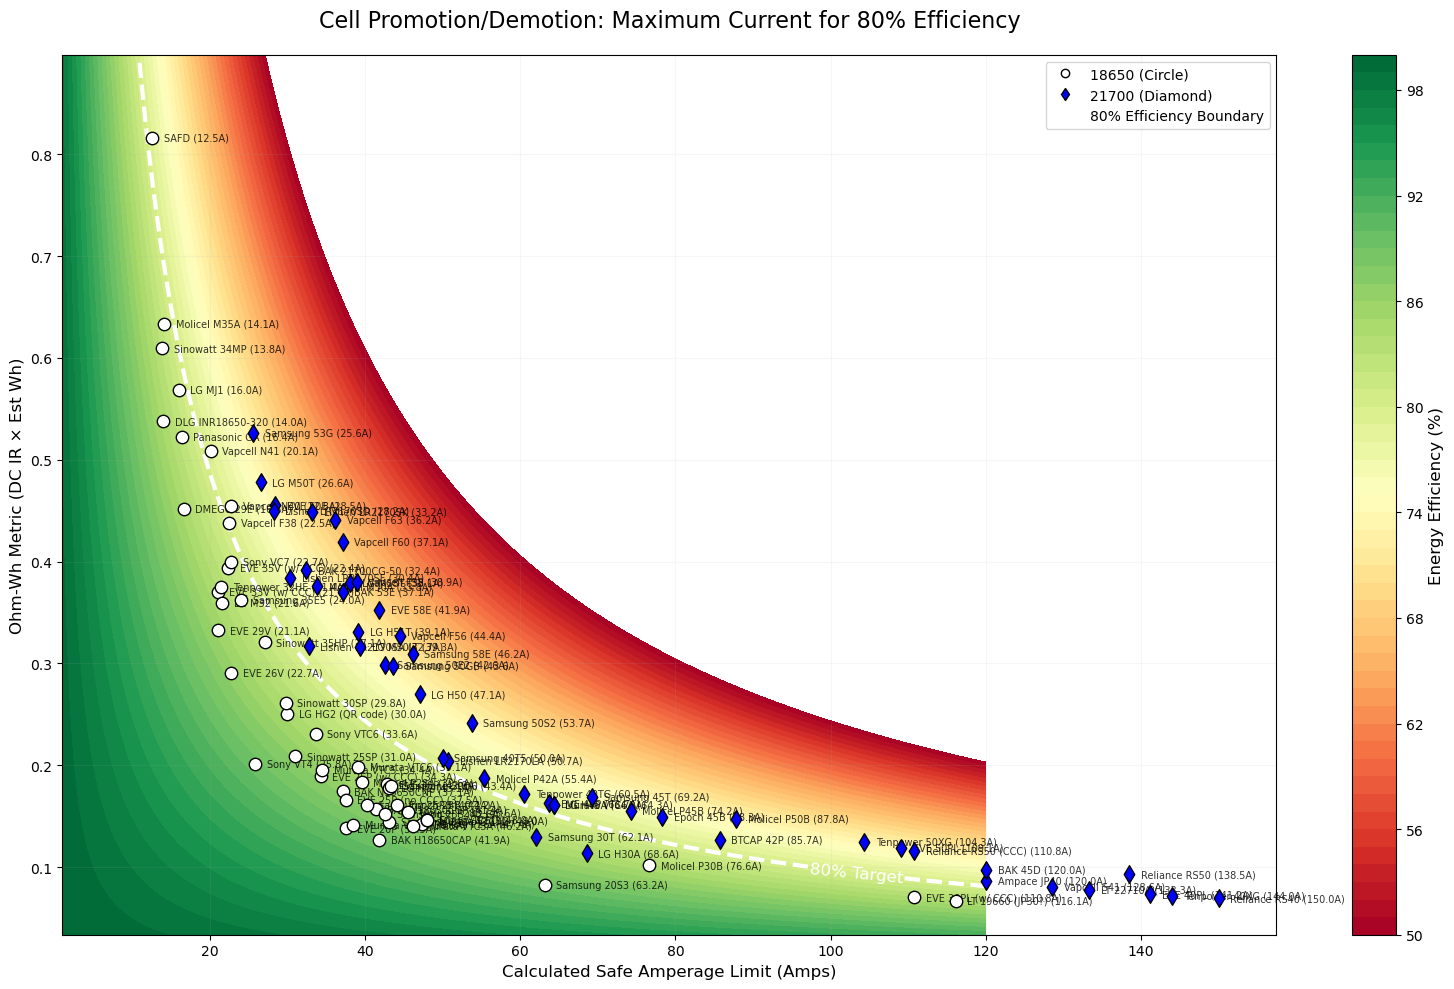

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data once with space-skipping
df = pd.read_csv(r'C:\Pythoning\Data\MoochBatteryDataV1.csv', skipinitialspace=True)

# 2. Force clean column names to fix KeyErrors
df.columns = df.columns.str.strip()

# 3. Setup Plotting Terrain (Efficiency Gradient)
amps = np.linspace(1, 120, 300) 
ohm_wh_range = np.linspace(df['Ohm-Wh'].min() * 0.5, df['Ohm-Wh'].max() * 1.1, 300)
A_grid, OW_grid = np.meshgrid(amps, ohm_wh_range)

# Physics Setup: Efficiency = 1 - (I * R / V_nom)
V_nom = 3.6
Wh_ref = df['Est WH'].mean() 
efficiency = 1 - (A_grid * (OW_grid / Wh_ref)) / V_nom
efficiency = np.clip(efficiency, 0, 1)

# 4. Create the Map
plt.figure(figsize=(16, 10))
cp = plt.contourf(A_grid, OW_grid, efficiency * 100, levels=np.arange(50, 101, 1), cmap='RdYlGn')
cbar = plt.colorbar(cp)
cbar.set_label('Energy Efficiency (%)', fontsize=12)

# Bold 80% Efficiency Line
lines = plt.contour(A_grid, OW_grid, efficiency * 100, levels=[80], colors='white', linewidths=3, linestyles='--')
plt.clabel(lines, inline=True, fontsize=12, fmt='80%% Target')

# 5. Plotting Individual Cell Limits
for i, row in df.iterrows():
    # Attempt to find the resistance column regardless of mohn/mohm typo
    col_name = 'DC IR (mohn)' if 'DC IR (mohn)' in df.columns else 'DC IR (mohm)'
    r_dc = row[col_name] / 1000
    
    # Calculate I at exactly 80% Efficiency (0.72V sag)
    # I = (0.2 * V_nom) / R
    i_limit = (0.2 * V_nom) / r_dc
    
    # Identify size and marker
    size = int(row['Cell Size'])
    marker = 'o' if size == 18650 else 'd'
    color = 'white' if size == 18650 else 'blue'
    
    # Plot cells on the 80% line
    plt.scatter(i_limit, row['Ohm-Wh'], color=color, edgecolor='black', 
                marker=marker, s=80, zorder=10)
    
    # Labels with calculated Amp limits
    plt.text(i_limit + 1.5, row['Ohm-Wh'], f"{row['Battery Model']} ({i_limit:.1f}A)", 
             fontsize=7, verticalalignment='center', alpha=0.8)

# 6. Formatting
plt.title('Cell Promotion/Demotion: Maximum Current for 80% Efficiency', fontsize=16, pad=20)
plt.xlabel('Calculated Safe Amperage Limit (Amps)', fontsize=12)
plt.ylabel('Ohm-Wh Metric (DC IR × Est Wh)', fontsize=12)

# Custom Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='k', label='18650 (Circle)', markerfacecolor='white', linestyle='None'),
    Line2D([0], [0], marker='d', color='k', label='21700 (Diamond)', markerfacecolor='blue', linestyle='None'),
    Line2D([0], [0], color='white', lw=2, linestyle='--', label='80% Efficiency Boundary')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()

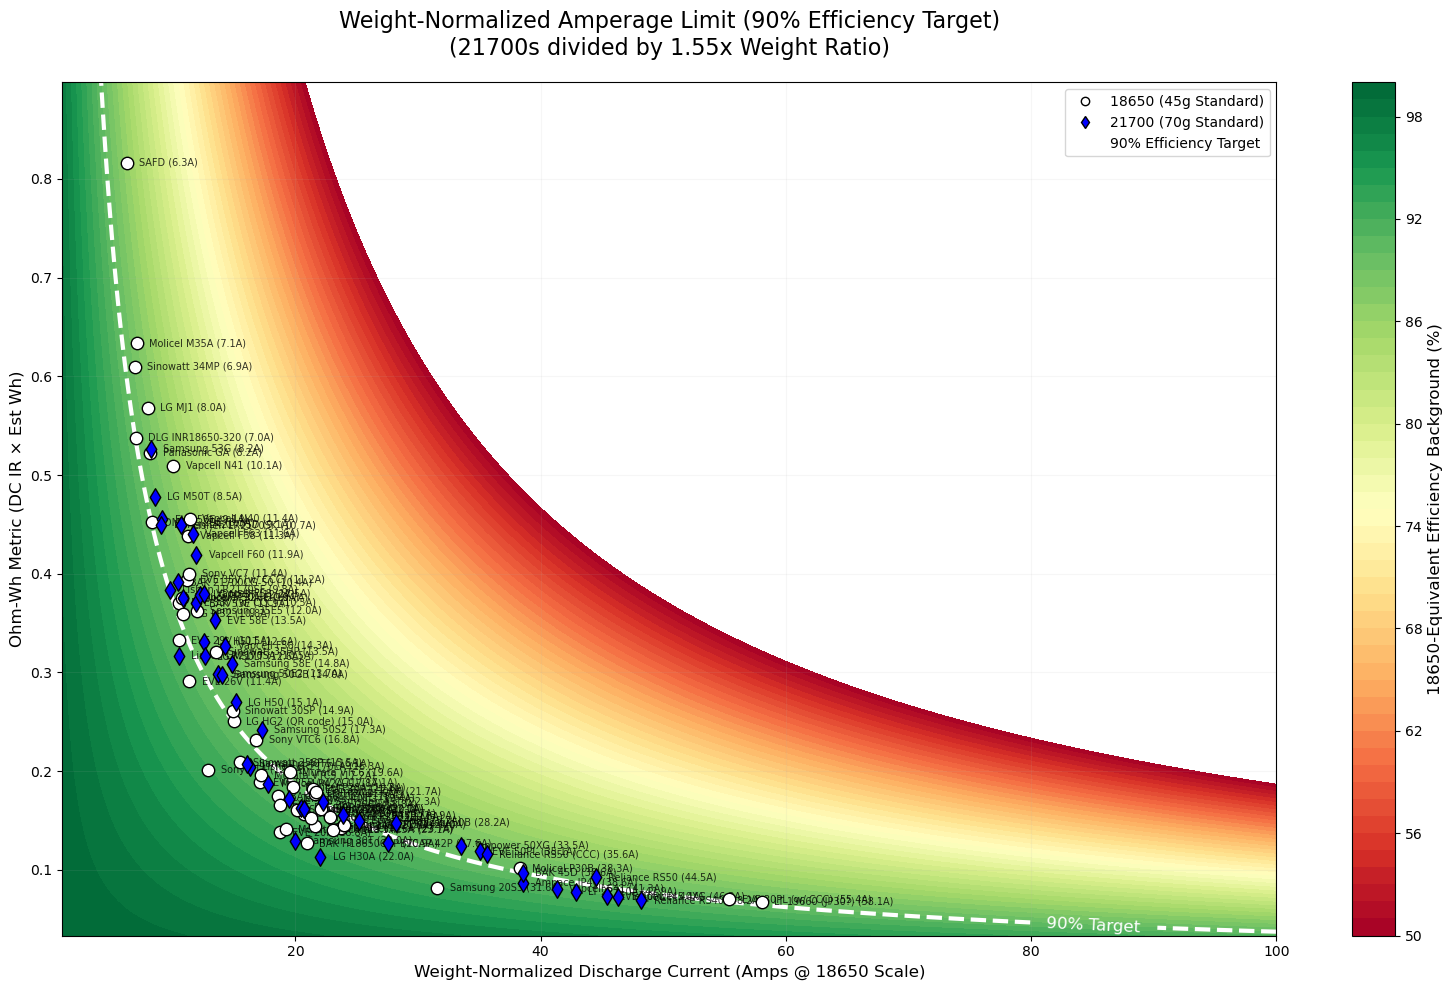

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load your local CSV data
# Note: Ensure the path is correct for your local machine
file_path = r'C:\Pythoning\Data\MoochBatteryDataV1.csv'
df = pd.read_csv(file_path, skipinitialspace=True)

# 2. Clean column names to prevent KeyErrors
df.columns = df.columns.str.strip()

# 3. Define Weight Normalization Parameters
W_18650 = 45.0  # Typical weight for 18650
W_21700 = 70.0  # Typical weight for 21700
Weight_Ratio = W_21700 / W_18650  # ~1.55x penalty factor

# 4. Setup Plotting Terrain (Efficiency Gradient)
amps = np.linspace(1, 100, 300) 
ohm_wh_range = np.linspace(df['Ohm-Wh'].min() * 0.5, df['Ohm-Wh'].max() * 1.1, 300)
A_grid, OW_grid = np.meshgrid(amps, ohm_wh_range)

V_nom = 3.6
# Using the average Wh of your specific 18650s for the background scale
wh_ref_18650 = df[df['Cell Size'] == 18650]['Est WH'].mean()
efficiency = 1 - (A_grid * (OW_grid / wh_ref_18650)) / V_nom
efficiency = np.clip(efficiency, 0, 1)

# 5. Create the Map
plt.figure(figsize=(16, 10))
cp = plt.contourf(A_grid, OW_grid, efficiency * 100, levels=np.arange(50, 101, 1), cmap='RdYlGn')
cbar = plt.colorbar(cp)
cbar.set_label('18650-Equivalent Efficiency Background (%)', fontsize=12)

# Bold 90% Efficiency Line Target
# We use %% to escape the percent sign and avoid a ValueError
lines = plt.contour(A_grid, OW_grid, efficiency * 100, levels=[90], colors='white', linewidths=3, linestyles='--')
plt.clabel(lines, inline=True, fontsize=12, fmt='90%% Target')

# 6. Plot Individual Cell Limits from CSV
for i, row in df.iterrows():
    # Dynamically find the resistance column
    col_name = 'DC IR (mohn)' if 'DC IR (mohn)' in df.columns else 'DC IR (mohm)'
    r_dc = row[col_name] / 1000
    
    # Calculate Real Current at 90% Efficiency (0.36V sag)
    # Current = (Efficiency_Loss * V_nom) / Resistance
    i_real_90 = (0.1 * V_nom) / r_dc
    
    # Normalize for Weight
    size = int(row['Cell Size'])
    if size == 21700:
        i_plot = i_real_90 / Weight_Ratio # Apply the 1.55x penalty
        marker = 'd'
        color = 'blue'
    else:
        i_plot = i_real_90 # 18650s are the baseline
        marker = 'o'
        color = 'white'
    
    # Plot points
    plt.scatter(i_plot, row['Ohm-Wh'], color=color, edgecolor='black', 
                marker=marker, s=80, zorder=10)
    
    # Add labels with normalized Amp limits
    plt.text(i_plot + 1.0, row['Ohm-Wh'], f"{row['Battery Model']} ({i_plot:.1f}A)", 
             fontsize=7, verticalalignment='center', alpha=0.8)

# 7. Formatting
plt.title('Weight-Normalized Amperage Limit (90% Efficiency Target)\n(21700s divided by 1.55x Weight Ratio)', fontsize=16, pad=20)
plt.xlabel('Weight-Normalized Discharge Current (Amps @ 18650 Scale)', fontsize=12)
plt.ylabel('Ohm-Wh Metric (DC IR × Est Wh)', fontsize=12)

# Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='k', label='18650 (45g Standard)', markerfacecolor='white', linestyle='None'),
    Line2D([0], [0], marker='d', color='k', label='21700 (70g Standard)', markerfacecolor='blue', linestyle='None'),
    Line2D([0], [0], color='white', lw=2, linestyle='--', label='90% Efficiency Target')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()

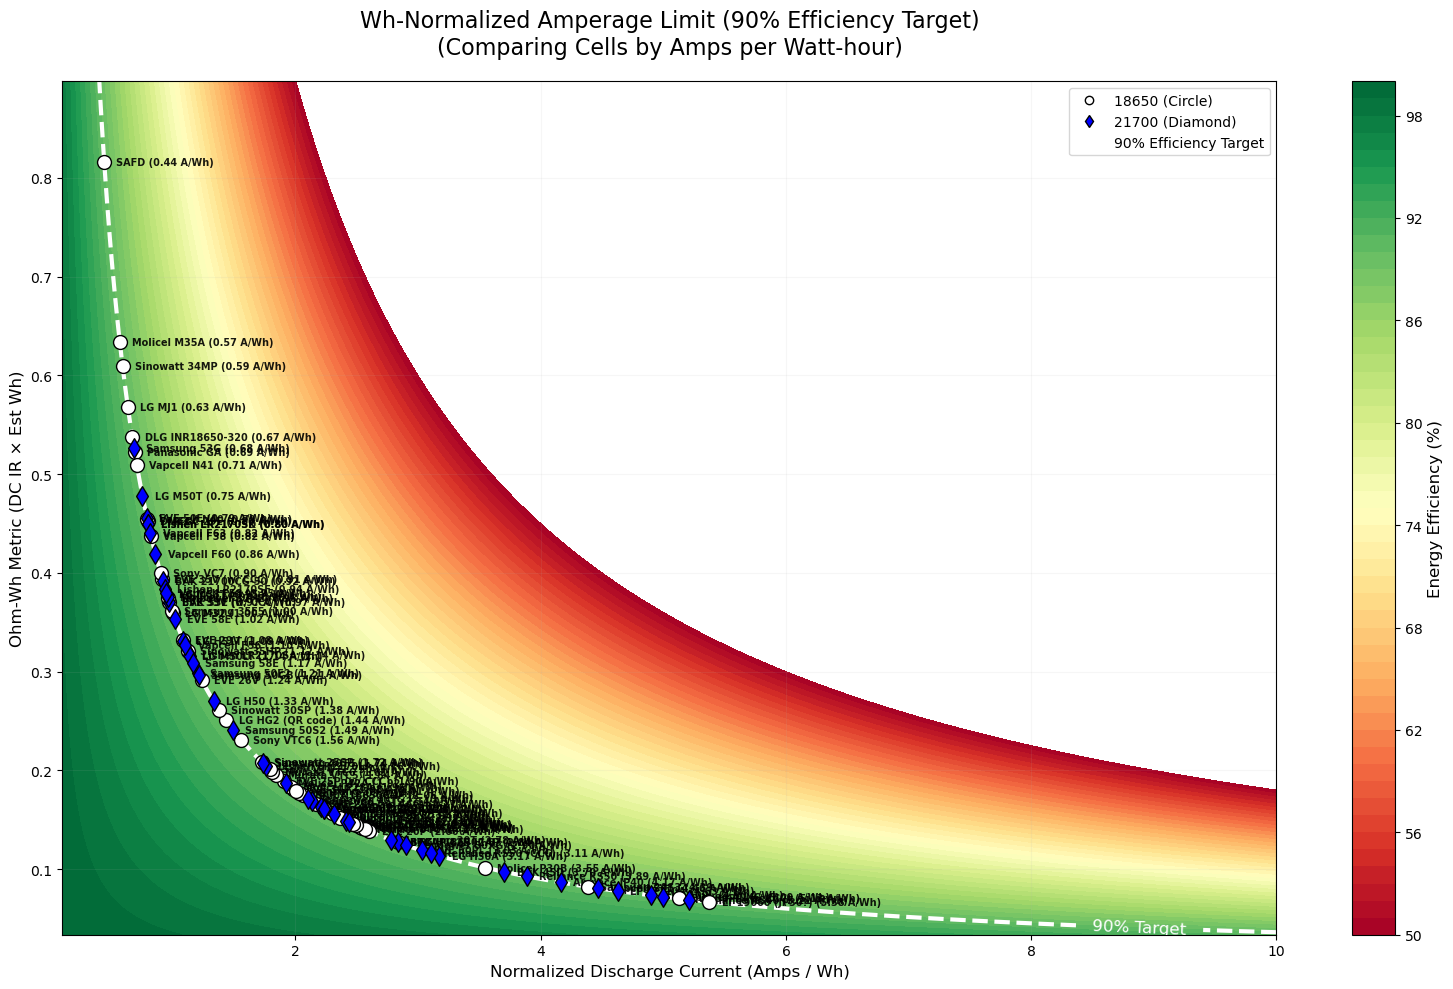

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load your local CSV data
file_path = r'C:\Pythoning\Data\MoochBatteryDataV1.csv'
df = pd.read_csv(file_path, skipinitialspace=True)

# 2. Clean column names to prevent KeyErrors
df.columns = df.columns.str.strip()

# 3. Setup Plotting Terrain (Efficiency Gradient in Normalized Space)
# X-axis: Amps per Wh (I/Wh)
# Y-axis: Ohm-Wh (R * Wh)
x_norm = np.linspace(0.1, 10.0, 400) 
y_metric = np.linspace(df['Ohm-Wh'].min() * 0.5, df['Ohm-Wh'].max() * 1.1, 400)
X_grid, Y_grid = np.meshgrid(x_norm, y_metric)

V_nom = 3.6
# Physics: Efficiency = 1 - (I * R / V_nom)
# Since x = I/Wh and y = R*Wh, then I*R = x * y
# Therefore: Efficiency = 1 - (X * Y / V_nom)
efficiency_grid = 1 - (X_grid * Y_grid / V_nom)
efficiency_grid = np.clip(efficiency_grid, 0, 1)

# 4. Create the Map
plt.figure(figsize=(16, 10))
cp = plt.contourf(X_grid, Y_grid, efficiency_grid * 100, levels=np.arange(50, 101, 1), cmap='RdYlGn')
cbar = plt.colorbar(cp)
cbar.set_label('Energy Efficiency (%)', fontsize=12)

# Bold 90% Efficiency Line Target
lines = plt.contour(X_grid, Y_grid, efficiency_grid * 100, levels=[90], colors='white', linewidths=3, linestyles='--')
plt.clabel(lines, inline=True, fontsize=12, fmt='90%% Target')

# 5. Plot Individual Cells from CSV
for i, row in df.iterrows():
    # Ohm-Wh is the Y coordinate
    ohm_wh = row['Ohm-Wh']
    
    # Calculate Normalized Current (I/Wh) to hit exactly 90% Efficiency
    # 1 - (x * ohm_wh / 3.6) = 0.9  =>  x * ohm_wh = 0.36
    i_per_wh = 0.36 / ohm_wh
    
    # Identify size and marker
    size = int(row['Cell Size'])
    marker = 'o' if size == 18650 else 'd'
    color = 'white' if size == 18650 else 'blue'
    
    # Plot points
    plt.scatter(i_per_wh, ohm_wh, color=color, edgecolor='black', 
                marker=marker, s=100, zorder=10)
    
    # Add labels with normalized values (Amps/Wh)
    plt.text(i_per_wh + 0.1, ohm_wh, f"{row['Battery Model']} ({i_per_wh:.2f} A/Wh)", 
             fontsize=7, verticalalignment='center', alpha=0.9, fontweight='bold')

# 6. Formatting
plt.title('Wh-Normalized Amperage Limit (90% Efficiency Target)\n(Comparing Cells by Amps per Watt-hour)', fontsize=16, pad=20)
plt.xlabel('Normalized Discharge Current (Amps / Wh)', fontsize=12)
plt.ylabel('Ohm-Wh Metric (DC IR × Est Wh)', fontsize=12)

# Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='k', label='18650 (Circle)', markerfacecolor='white', linestyle='None'),
    Line2D([0], [0], marker='d', color='k', label='21700 (Diamond)', markerfacecolor='blue', linestyle='None'),
    Line2D([0], [0], color='white', lw=2, linestyle='--', label='90% Efficiency Target')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()

KeyError: 'DC IR (mohn)'

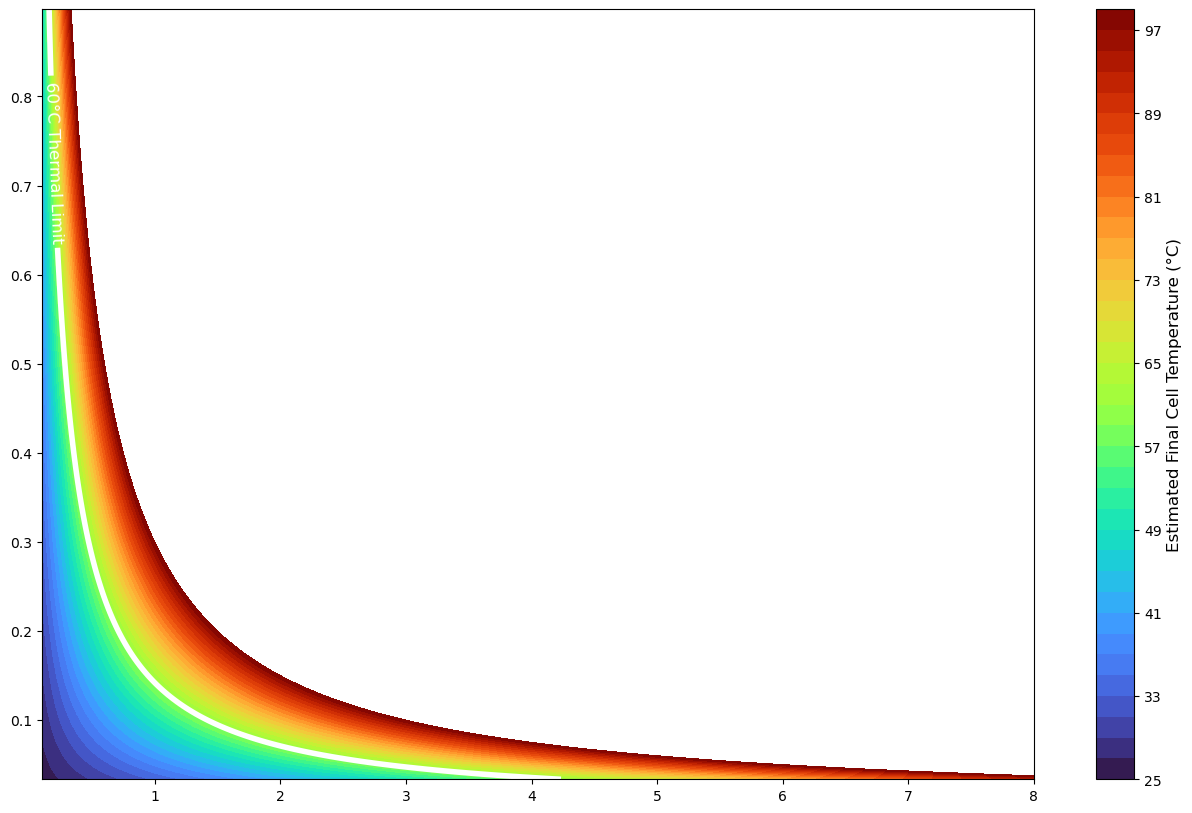

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the dataset
file_path = r'C:\Pythoning\Data\MoochBatteryDataV1.csv'
df = pd.read_csv(file_path, skipinitialspace=True)
df.columns = df.columns.str.strip()

# 2. Thermal & Physics Parameters
T_ambient = 25
T_limit = 60
Delta_T = T_limit - T_ambient # 35 degree rise
c_p = 900    # J/kg*K (Specific Heat)
V_nom = 3.6  # Nominal Voltage

# 3. Setup Plotting Terrain (Temperature Gradient)
# X-axis: Normalized Current (I/Wh)
# Y-axis: Ohm-Wh Metric (R * Wh)
x_norm = np.linspace(0.1, 8.0, 400) 
y_metric = np.linspace(df['Ohm-Wh'].min() * 0.5, df['Ohm-Wh'].max() * 1.1, 400)
X_grid, Y_grid = np.meshgrid(x_norm, y_metric)

# Background Map: Predicted Final Temperature
# Using a reference m/Wh (mass per energy) of 0.0045 kg/Wh (typical for high-power cells)
m_wh_ref = 0.045 / 10.0 # 45g for a 10Wh cell
T_final_grid = T_ambient + (3600 * X_grid * Y_grid) / (V_nom * m_wh_ref * c_p)

# 4. Create the Map
plt.figure(figsize=(16, 10))
cp = plt.contourf(X_grid, Y_grid, T_final_grid, levels=np.arange(25, 101, 2), cmap='turbo')
cbar = plt.colorbar(cp)
cbar.set_label('Estimated Final Cell Temperature (°C)', fontsize=12)

# Bold 60°C Safety Boundary
lines = plt.contour(X_grid, Y_grid, T_final_grid, levels=[60], colors='white', linewidths=4, linestyles='-')
plt.clabel(lines, inline=True, fontsize=12, fmt='60°C Thermal Limit')

# 5. Plot Individual Cells at their Thermal Limit
for i, row in df.iterrows():
    # Get cell specifics
    wh = row['Est WH']
    size = int(row['Cell Size'])
    m_cell = 0.045 if size == 18650 else 0.070 # Typical weights
    r_dc = row['DC IR (mohn)'] / 1000
    
    # Calculate I_limit where T reaches 60°C
    # Derived from: (I*R*Wh*3600)/V_nom = m*cp*Delta_T
    i_limit = (m_cell * c_p * Delta_T * V_nom) / (r_dc * wh * 3600)
    
    # Normalize by Wh for the X-axis
    i_per_wh = i_limit / wh
    
    # Plotting styles
    marker = 'o' if size == 18650 else 'd'
    color = 'white' if size == 18650 else 'blue'
    
    plt.scatter(i_per_wh, row['Ohm-Wh'], color=color, edgecolor='black', marker=marker, s=100, zorder=10)
    plt.text(i_per_wh + 0.1, row['Ohm-Wh'], f"{row['Battery Model']} ({i_per_wh:.2f} A/Wh)", 
             fontsize=7, verticalalignment='center', alpha=0.9, fontweight='bold')

# 6. Formatting
plt.title('Thermal Limit Map: Amps/Wh to reach 60°C', fontsize=16, pad=20)
plt.xlabel('Normalized Discharge Current (Amps / Wh)', fontsize=12)
plt.ylabel('Ohm-Wh Metric (DC IR × Est Wh)', fontsize=12)
plt.legend([
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='w', markeredgecolor='k', markersize=10, label='18650 (45g)'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='blue', markeredgecolor='k', markersize=10, label='21700 (70g)')
], ['18650 (45g)', '21700 (70g)'], loc='upper right')

plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()

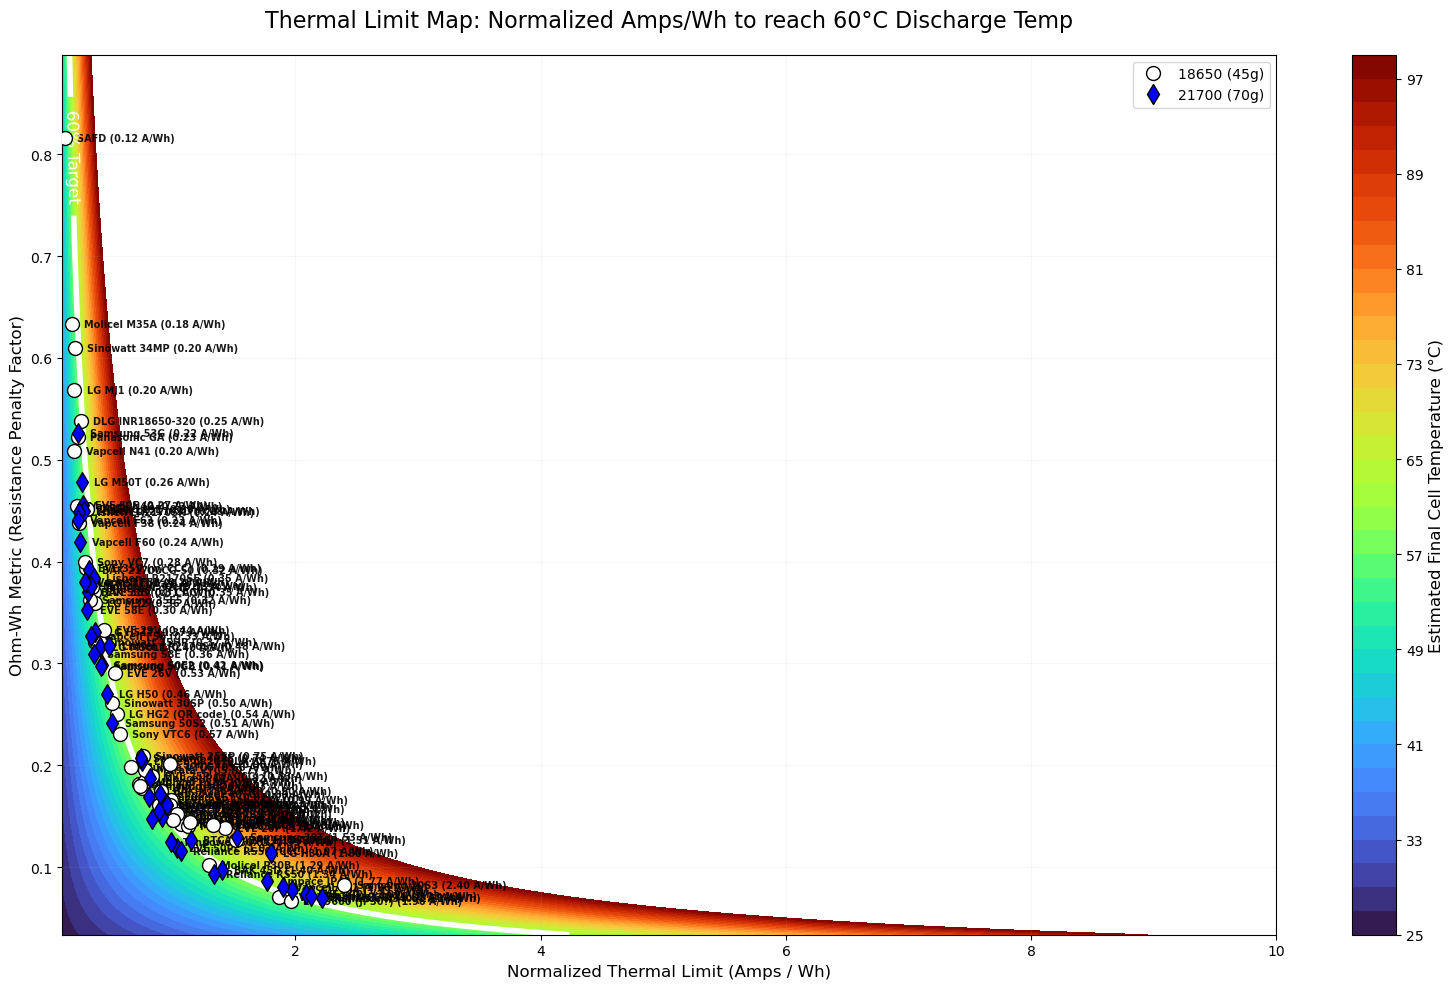

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data
file_path = r'C:\Pythoning\Data\MoochBatteryDataV1.csv'
df = pd.read_csv(file_path, skipinitialspace=True)

# 2. Force clean column names to fix hidden spaces
df.columns = df.columns.str.strip()

# 3. Thermal & Physics Parameters
T_ambient = 25
T_limit = 60
Delta_T = T_limit - T_ambient # 35 degree rise
c_p = 900    # J/kg*K (Specific Heat Capacity)
V_nom = 3.6  # Nominal Voltage

# 4. Setup Plotting Terrain (Temperature Gradient)
x_norm = np.linspace(0.1, 10.0, 400) 
y_metric = np.linspace(df['Ohm-Wh'].min() * 0.5, df['Ohm-Wh'].max() * 1.1, 400)
X_grid, Y_grid = np.meshgrid(x_norm, y_metric)

# Background Map: Predicted Final Temperature
# Using a reference mass-to-energy ratio (kg/Wh)
m_wh_ref = 0.045 / 10.0 
T_final_grid = T_ambient + (3600 * X_grid * Y_grid) / (V_nom * m_wh_ref * c_p)

# Create the Map
plt.figure(figsize=(16, 10))
cp = plt.contourf(X_grid, Y_grid, T_final_grid, levels=np.arange(25, 101, 2), cmap='turbo')
cbar = plt.colorbar(cp)
cbar.set_label('Estimated Final Cell Temperature (°C)', fontsize=12)

# Bold 60°C Safety Boundary
lines = plt.contour(X_grid, Y_grid, T_final_grid, levels=[60], colors='white', linewidths=4, linestyles='-')
plt.clabel(lines, inline=True, fontsize=12, fmt='60%% Target')

# 5. Plot Individual Cells at their Thermal Limit
for i, row in df.iterrows():
    # FLEXIBLE COLUMN CHECK: Handles 'mohn' vs 'mohm' typos automatically
    ir_col = 'DC IR (mohn)' if 'DC IR (mohn)' in df.columns else 'DC IR (mohm)'
    r_dc = row[ir_col] / 1000
    
    # Get cell specifics
    wh = row['Est WH']
    size = int(row['Cell Size'])
    m_cell = 0.045 if size == 18650 else 0.070 # Typical weights
    
    # Calculate Amperage limit to reach exactly 60°C
    # Current = (Mass * Cp * DeltaT * Vnom) / (R * Wh * 3600)
    i_limit = (m_cell * c_p * Delta_T * V_nom) / (r_dc * wh * 3600)
    
    # Normalize by Wh for the X-axis (Amps per Wh)
    i_per_wh = i_limit / wh
    
    # Plotting styles
    marker = 'o' if size == 18650 else 'd'
    color = 'white' if size == 18650 else 'blue'
    
    plt.scatter(i_per_wh, row['Ohm-Wh'], color=color, edgecolor='black', marker=marker, s=100, zorder=10)
    plt.text(i_per_wh + 0.1, row['Ohm-Wh'], f"{row['Battery Model']} ({i_per_wh:.2f} A/Wh)", 
             fontsize=7, verticalalignment='center', alpha=0.9, fontweight='bold')

# 6. Formatting
plt.title('Thermal Limit Map: Normalized Amps/Wh to reach 60°C Discharge Temp', fontsize=16, pad=20)
plt.xlabel('Normalized Thermal Limit (Amps / Wh)', fontsize=12)
plt.ylabel('Ohm-Wh Metric (Resistance Penalty Factor)', fontsize=12)
plt.legend([
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='w', markeredgecolor='k', markersize=10, label='18650 (45g)'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='blue', markeredgecolor='k', markersize=10, label='21700 (70g)')
], ['18650 (45g)', '21700 (70g)'], loc='upper right')

plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()

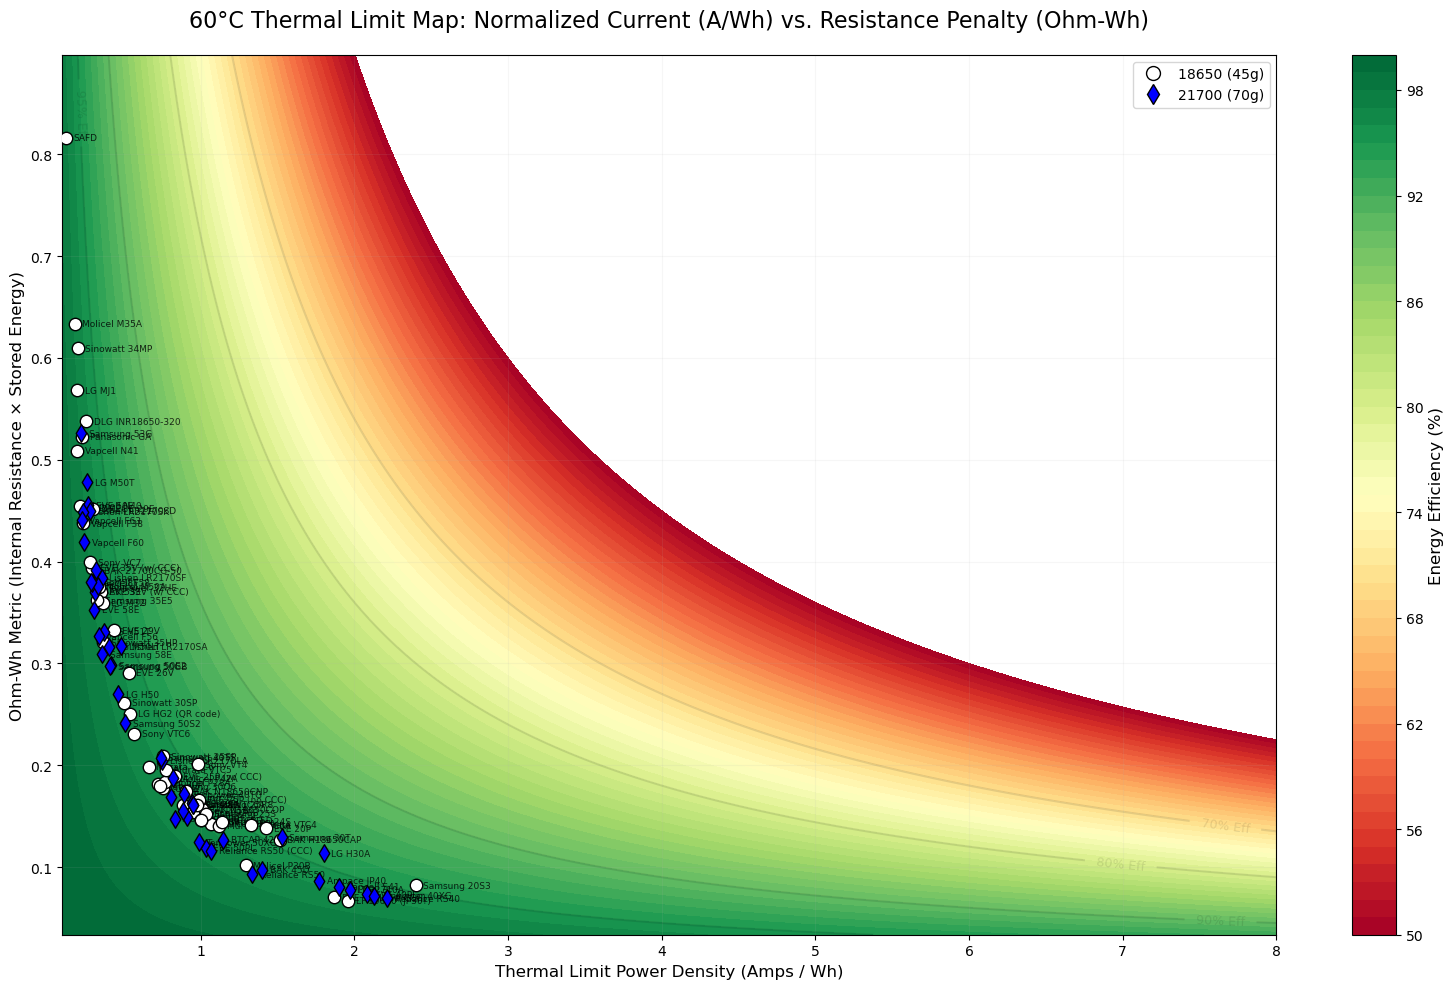

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data
file_path = r'C:\Pythoning\Data\MoochBatteryDataV1.csv'
df = pd.read_csv(file_path, skipinitialspace=True)

# 2. Force clean column names to prevent KeyErrors
df.columns = df.columns.str.strip()

# 3. Physics & Thermal Parameters
T_ambient = 25
T_limit = 60
Delta_T = T_limit - T_ambient # 35°C rise
c_p = 900    # J/kg*K (Specific Heat Capacity)
V_nom = 3.6  # Nominal Voltage

# 4. Setup Plotting Terrain (Efficiency Map)
# X-axis: Normalized Current (I/Wh)
# Y-axis: Ohm-Wh Metric (R * Wh)
x_norm = np.linspace(0.1, 8.0, 500) 
y_metric = np.linspace(df['Ohm-Wh'].min() * 0.5, df['Ohm-Wh'].max() * 1.1, 500)
X_grid, Y_grid = np.meshgrid(x_norm, y_metric)

# Background: Efficiency = 1 - (I * R / V_nom)
# Since X = I/Wh and Y = R*Wh, then I*R = X*Y
efficiency_grid = 1 - (X_grid * Y_grid / V_nom)
efficiency_grid = np.clip(efficiency_grid, 0, 1)

# 5. Create the Map
plt.figure(figsize=(16, 10))
cp = plt.contourf(X_grid, Y_grid, efficiency_grid * 100, levels=np.arange(50, 101, 1), cmap='RdYlGn')
cbar = plt.colorbar(cp)
cbar.set_label('Energy Efficiency (%)', fontsize=12)

# Add Efficiency guides
lines = plt.contour(X_grid, Y_grid, efficiency_grid * 100, levels=[70, 80, 90, 95], colors='black', alpha=0.1)
plt.clabel(lines, inline=True, fontsize=9, fmt='%d%% Eff')

# 6. Plot Individual Cells at their 60°C Thermal Limit
for i, row in df.iterrows():
    # Robust column identification
    ir_col = 'DC IR (mohn)' if 'DC IR (mohn)' in df.columns else 'DC IR (mohm)'
    r_dc = row[ir_col] / 1000
    wh = row['Est WH']
    ohm_wh = row['Ohm-Wh']
    
    # Typical weights
    size = int(row['Cell Size'])
    m_cell = 0.045 if size == 18650 else 0.070 
    
    # Calculate I at 60°C limit
    # Current = (Mass * Cp * DeltaT * Vnom) / (R * Wh * 3600)
    i_limit = (m_cell * c_p * Delta_T * V_nom) / (r_dc * wh * 3600)
    
    # Normalized X-coordinate: Amps / Wh
    x_pos = i_limit / wh
    
    # Plotting styles
    marker = 'o' if size == 18650 else 'd'
    color = 'white' if size == 18650 else 'blue'
    
    plt.scatter(x_pos, ohm_wh, color=color, edgecolor='black', marker=marker, s=80, zorder=10)
    
    # Small labels for clarity
    plt.text(x_pos + 0.05, ohm_wh, f"{row['Battery Model']}", 
             fontsize=6.5, verticalalignment='center', alpha=0.8)

# 7. Formatting
plt.title('60°C Thermal Limit Map: Normalized Current (A/Wh) vs. Resistance Penalty (Ohm-Wh)', fontsize=16, pad=20)
plt.xlabel('Thermal Limit Power Density (Amps / Wh)', fontsize=12)
plt.ylabel('Ohm-Wh Metric (Internal Resistance × Stored Energy)', fontsize=12)

# Custom Legend
plt.legend([
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='w', markeredgecolor='k', markersize=10, label='18650 (45g)'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='blue', markeredgecolor='k', markersize=10, label='21700 (70g)')
], ['18650 (45g)', '21700 (70g)'], loc='upper right')

plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()

Success: Rankings exported to C:\Pythoning\Outputs


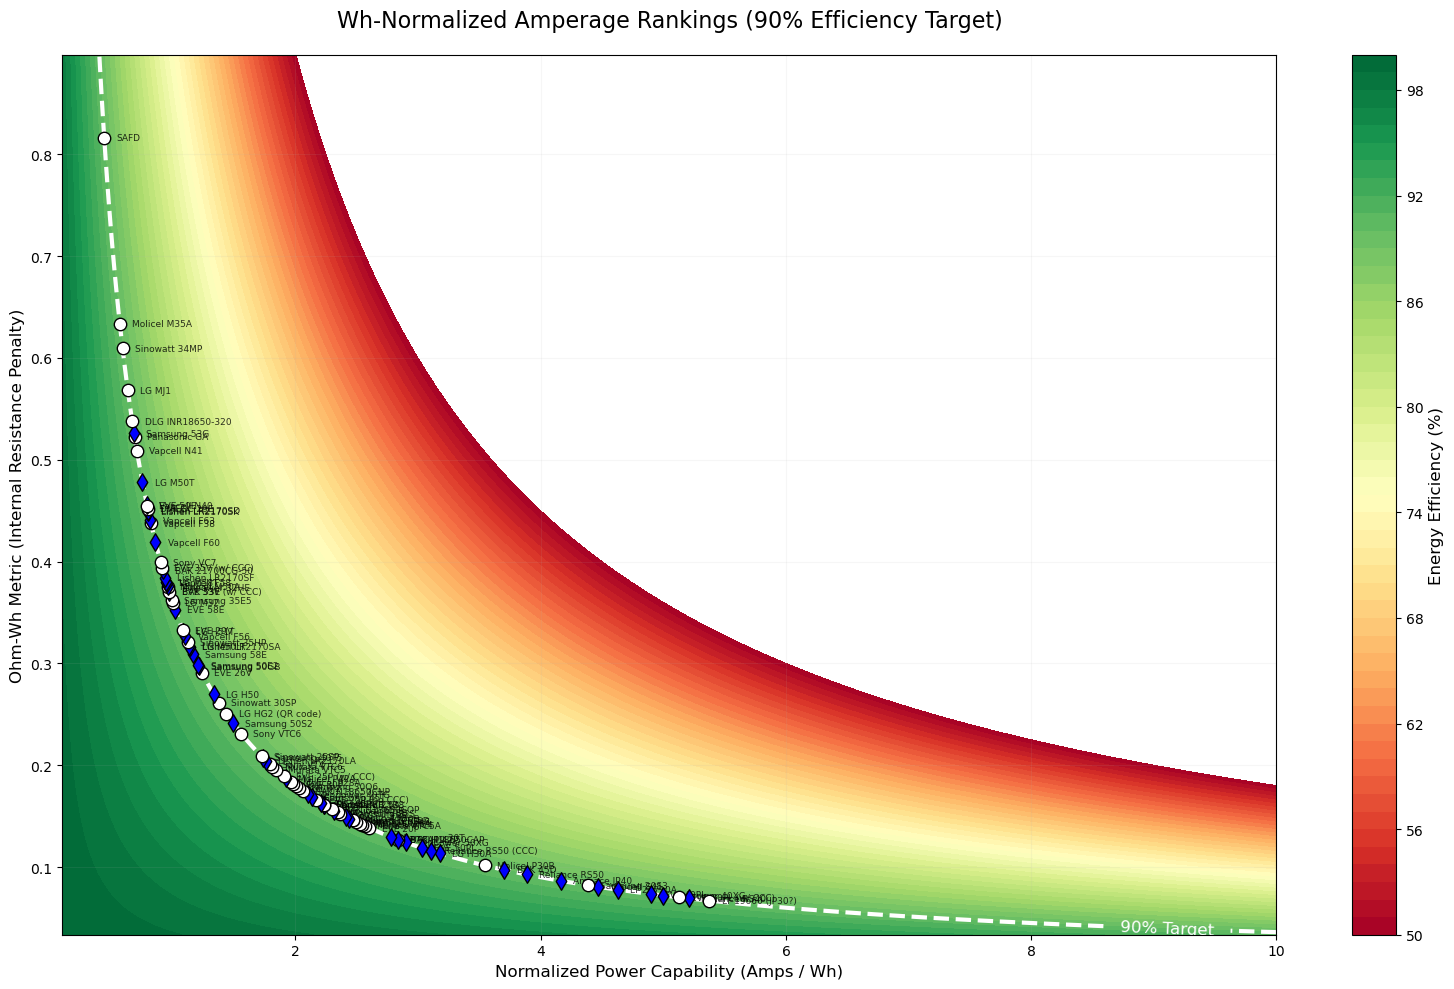

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. Load your local CSV data
file_path = r'C:\Pythoning\Data\MoochBatteryDataV1.csv'
df = pd.read_csv(file_path, skipinitialspace=True)

# 2. Clean column names to prevent KeyErrors
df.columns = df.columns.str.strip()

# 3. Setup Plotting Terrain (Efficiency Map)
# X-axis: Normalized Current (I/Wh)
# Y-axis: Ohm-Wh Metric (R * Wh)
x_norm = np.linspace(0.1, 10.0, 500) 
y_metric = np.linspace(df['Ohm-Wh'].min() * 0.5, df['Ohm-Wh'].max() * 1.1, 500)
X_grid, Y_grid = np.meshgrid(x_norm, y_metric)

V_nom = 3.6
# Physics: Efficiency = 1 - (I * R / V_nom)
efficiency_grid = 1 - (X_grid * Y_grid / V_nom)
efficiency_grid = np.clip(efficiency_grid, 0, 1)

# 4. Process Data & Calculate Rankings
results = []

for i, row in df.iterrows():
    # Robust column identification
    ir_col = 'DC IR (mohn)' if 'DC IR (mohn)' in df.columns else 'DC IR (mohm)'
    r_dc = row[ir_col] / 1000
    wh = row['Est WH']
    ohm_wh = row['Ohm-Wh']
    
    # Calculate I at exactly 90% Efficiency (0.36V sag)
    # Current = (0.1 * V_nom) / R
    i_limit = (0.1 * V_nom) / r_dc
    i_per_wh = i_limit / wh
    
    # Store for Export
    results.append({
        'Battery Model': row['Battery Model'],
        'Cell Size': row['Cell Size'],
        'Ohm-Wh': ohm_wh,
        'Max Amps @ 90%': round(i_limit, 2),
        'Normalized A/Wh': round(i_per_wh, 3)
    })

# Convert results to DataFrame and Sort by the most capable cells
ranking_df = pd.DataFrame(results).sort_values(by='Normalized A/Wh', ascending=False)

# 5. Export to CSV
output_path = r'C:\Pythoning\Outputs'
if not os.path.exists(output_path):
    os.makedirs(output_path)
ranking_df.to_csv(os.path.join(output_path, 'Battery_Rankings_90Eff.csv'), index=False)
print(f"Success: Rankings exported to {output_path}")

# 6. Create the Map
plt.figure(figsize=(16, 10))
cp = plt.contourf(X_grid, Y_grid, efficiency_grid * 100, levels=np.arange(50, 101, 1), cmap='RdYlGn')
cbar = plt.colorbar(cp)
cbar.set_label('Energy Efficiency (%)', fontsize=12)

# Bold 90% Efficiency Line Target
lines = plt.contour(X_grid, Y_grid, efficiency_grid * 100, levels=[90], colors='white', linewidths=3, linestyles='--')
plt.clabel(lines, inline=True, fontsize=12, fmt='90%% Target')

# Plot Cells
for _, res in ranking_df.iterrows():
    marker = 'o' if res['Cell Size'] == 18650 else 'd'
    color = 'white' if res['Cell Size'] == 18650 else 'blue'
    
    plt.scatter(res['Normalized A/Wh'], res['Ohm-Wh'], color=color, edgecolor='black', marker=marker, s=80, zorder=10)
    plt.text(res['Normalized A/Wh'] + 0.1, res['Ohm-Wh'], f"{res['Battery Model']}", 
             fontsize=6.5, verticalalignment='center', alpha=0.8)

plt.title('Wh-Normalized Amperage Rankings (90% Efficiency Target)', fontsize=16, pad=20)
plt.xlabel('Normalized Power Capability (Amps / Wh)', fontsize=12)
plt.ylabel('Ohm-Wh Metric (Internal Resistance Penalty)', fontsize=12)
plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()

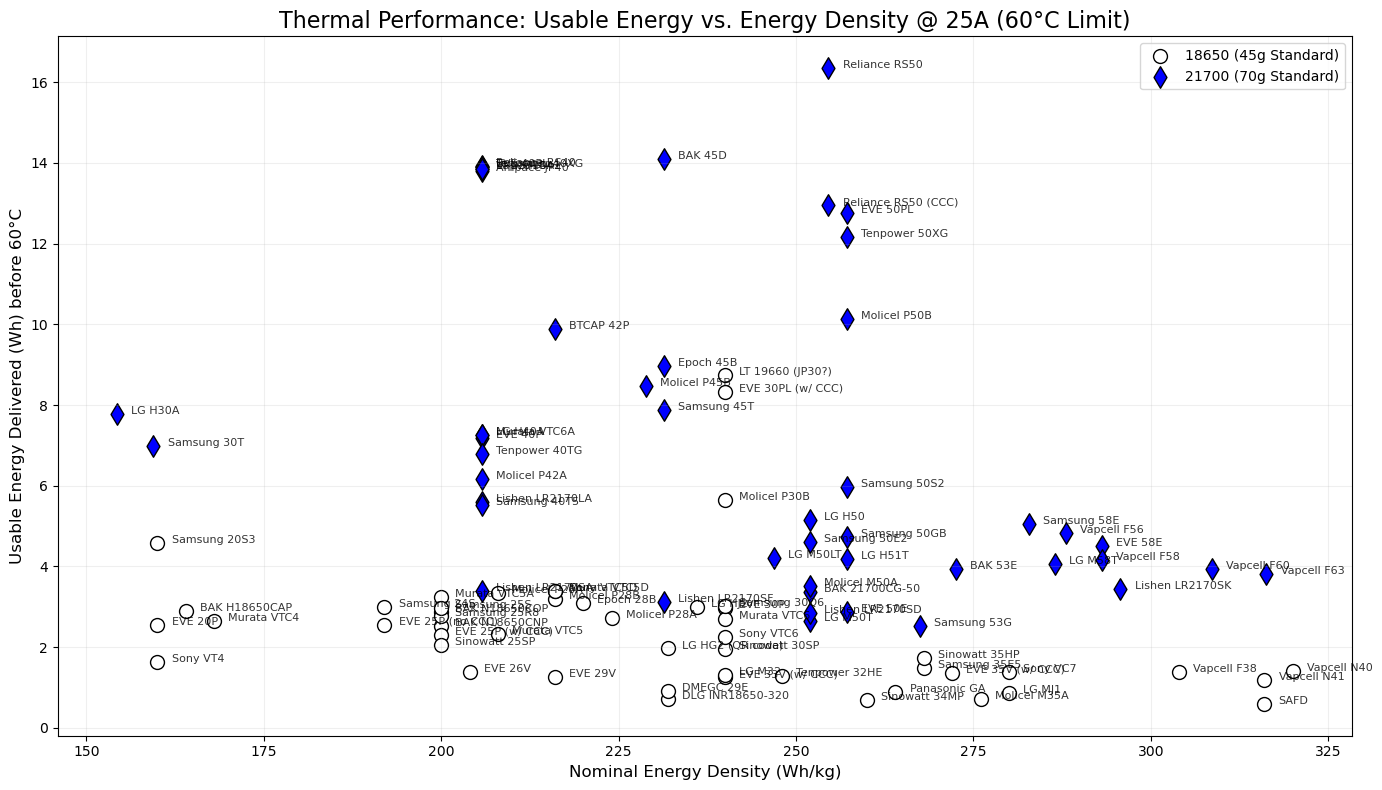

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and Clean Data
file_path = r'C:\Pythoning\Data\MoochBatteryDataV1.csv'
df = pd.read_csv(file_path, skipinitialspace=True)
df.columns = df.columns.str.strip()

# 2. Parameters
I_race = 25      # Constant current load (Amps)
V_nom = 3.6      # Nominal Voltage
T_rise = 35      # 60C - 25C
c_p = 900        # J/kg*K
E_limit_18650 = (0.045 * c_p * T_rise) / 3600  # Max waste Wh allowed
E_limit_21700 = (0.070 * c_p * T_rise) / 3600  # Max waste Wh allowed

# 3. Calculate Usable Energy and Density
plot_data = []

for i, row in df.iterrows():
    # Identify Cell Specs
    ir_col = 'DC IR (mohn)' if 'DC IR (mohn)' in df.columns else 'DC IR (mohm)'
    r_dc = row[ir_col] / 1000
    wh_nom = row['Est WH']
    size = int(row['Cell Size'])
    m_kg = 0.045 if size == 18650 else 0.070
    e_limit = E_limit_18650 if size == 18650 else E_limit_21700
    
    # Calculate Energy Loss at Race Current (25A)
    # E_loss = (I^2 * R * t) / 3600 where t = Wh_nom / (V_nom * I)
    # Logic: E_loss = (I * R * Wh_nom) / V_nom
    e_loss_predicted = (I_race * r_dc * wh_nom) / V_nom
    
    # Usable Energy Calculation
    if e_loss_predicted <= e_limit:
        # Cell finishes discharge before hitting 60C
        wh_usable = wh_nom - e_loss_predicted
    else:
        # Cell hits 60C limit and must stop
        # Usable Wh = (V_nom - I*R) * (E_limit / (I*R))
        wh_usable = ((V_nom / (I_race * r_dc)) - 1) * e_limit
    
    # Calculate Density (Wh/kg)
    nominal_density = (wh_nom / m_kg)
    usable_density = (wh_usable / m_kg)
    
    plot_data.append({
        'Model': row['Battery Model'],
        'Size': size,
        'Nominal Density': nominal_density,
        'Usable Wh': wh_usable,
        'Usable Density': usable_density
    })

pdf = pd.DataFrame(plot_data)

# 4. Create the Plot
plt.figure(figsize=(14, 8))

# Split for markers
d18 = pdf[pdf['Size'] == 18650]
d21 = pdf[pdf['Size'] == 21700]

plt.scatter(d18['Nominal Density'], d18['Usable Wh'], c='white', edgecolors='black', 
            marker='o', s=100, label='18650 (45g Standard)')
plt.scatter(d21['Nominal Density'], d21['Usable Wh'], c='blue', edgecolors='black', 
            marker='d', s=120, label='21700 (70g Standard)')

# Add labels
for i, row in pdf.iterrows():
    plt.text(row['Nominal Density'] + 2, row['Usable Wh'], row['Model'], fontsize=8, alpha=0.8)

# Formatting
plt.title(f'Thermal Performance: Usable Energy vs. Energy Density @ {I_race}A (60°C Limit)', fontsize=16)
plt.xlabel('Nominal Energy Density (Wh/kg)', fontsize=12)
plt.ylabel('Usable Energy Delivered (Wh) before 60°C', fontsize=12)
plt.grid(True, alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()

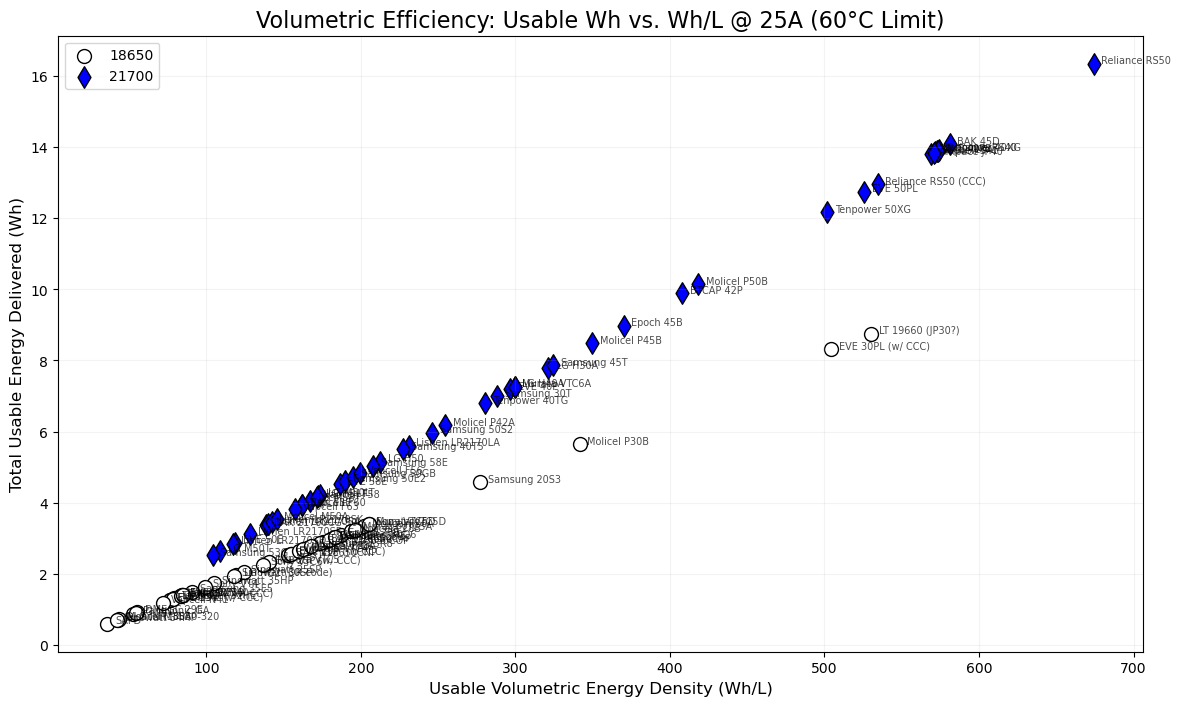

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and Clean Data
file_path = r'C:\Pythoning\Data\MoochBatteryDataV1.csv'
df = pd.read_csv(file_path, skipinitialspace=True)
df.columns = df.columns.str.strip()

# 2. Parameters & Constants
I_race = 25      # Constant current load (Amps)
V_nom = 3.6      # Nominal Voltage
T_rise = 35      # 60C - 25C safety limit
c_p = 900        # J/kg*K

# Standard Cell Volumes (m^3) and Masses (kg)
VOL_18650 = 16.51e-6  # 16.51 cm^3
VOL_21700 = 24.25e-6  # 24.25 cm^3
MASS_18650 = 0.045    # 45g
MASS_21700 = 0.070    # 70g

# 3. Calculate Usable Energy Normalized by Size
plot_data = []

for i, row in df.iterrows():
    ir_col = 'DC IR (mohn)' if 'DC IR (mohn)' in df.columns else 'DC IR (mohm)'
    r_dc = row[ir_col] / 1000
    wh_nom = row['Est WH']
    size = int(row['Cell Size'])
    
    # Select physical constants based on size
    m_kg = MASS_18650 if size == 18650 else MASS_21700
    vol_m3 = VOL_18650 if size == 18650 else VOL_21700
    
    # Thermal Energy Limit (Joules) = mass * Cp * DeltaT
    joule_limit = m_kg * c_p * T_rise
    wh_thermal_limit = joule_limit / 3600
    
    # Energy Loss at Race Current (25A) = (I * R * Wh_nom) / V_nom
    e_loss_predicted = (I_race * r_dc * wh_nom) / V_nom
    
    # Logic: If predicted heat exceeds the 60C limit, stop early
    if e_loss_predicted <= wh_thermal_limit:
        wh_usable = wh_nom - e_loss_predicted
    else:
        # Usable Wh is limited by the point where the cell hits 60C
        wh_usable = ((V_nom / (I_race * r_dc)) - 1) * wh_thermal_limit
    
    # Calculate Density Metrics
    vol_density_wh_l = (wh_usable / (vol_m3 * 1000)) # Wh per Liter
    
    plot_data.append({
        'Model': row['Battery Model'],
        'Size': size,
        'Volumetric Density': vol_density_wh_l,
        'Usable Wh': wh_usable
    })

pdf = pd.DataFrame(plot_data)

# 4. Create the Plot
plt.figure(figsize=(14, 8))
d18 = pdf[pdf['Size'] == 18650]
d21 = pdf[pdf['Size'] == 21700]

plt.scatter(d18['Volumetric Density'], d18['Usable Wh'], c='white', edgecolors='black', marker='o', s=100, label='18650')
plt.scatter(d21['Volumetric Density'], d21['Usable Wh'], c='blue', edgecolors='black', marker='d', s=120, label='21700')

# Labels
for i, row in pdf.iterrows():
    plt.text(row['Volumetric Density'] + 5, row['Usable Wh'], row['Model'], fontsize=7, alpha=0.7)

plt.title(f'Volumetric Efficiency: Usable Wh vs. Wh/L @ {I_race}A (60°C Limit)', fontsize=16)
plt.xlabel('Usable Volumetric Energy Density (Wh/L)', fontsize=12)
plt.ylabel('Total Usable Energy Delivered (Wh)', fontsize=12)
plt.grid(True, alpha=0.15)
plt.legend()
plt.show()

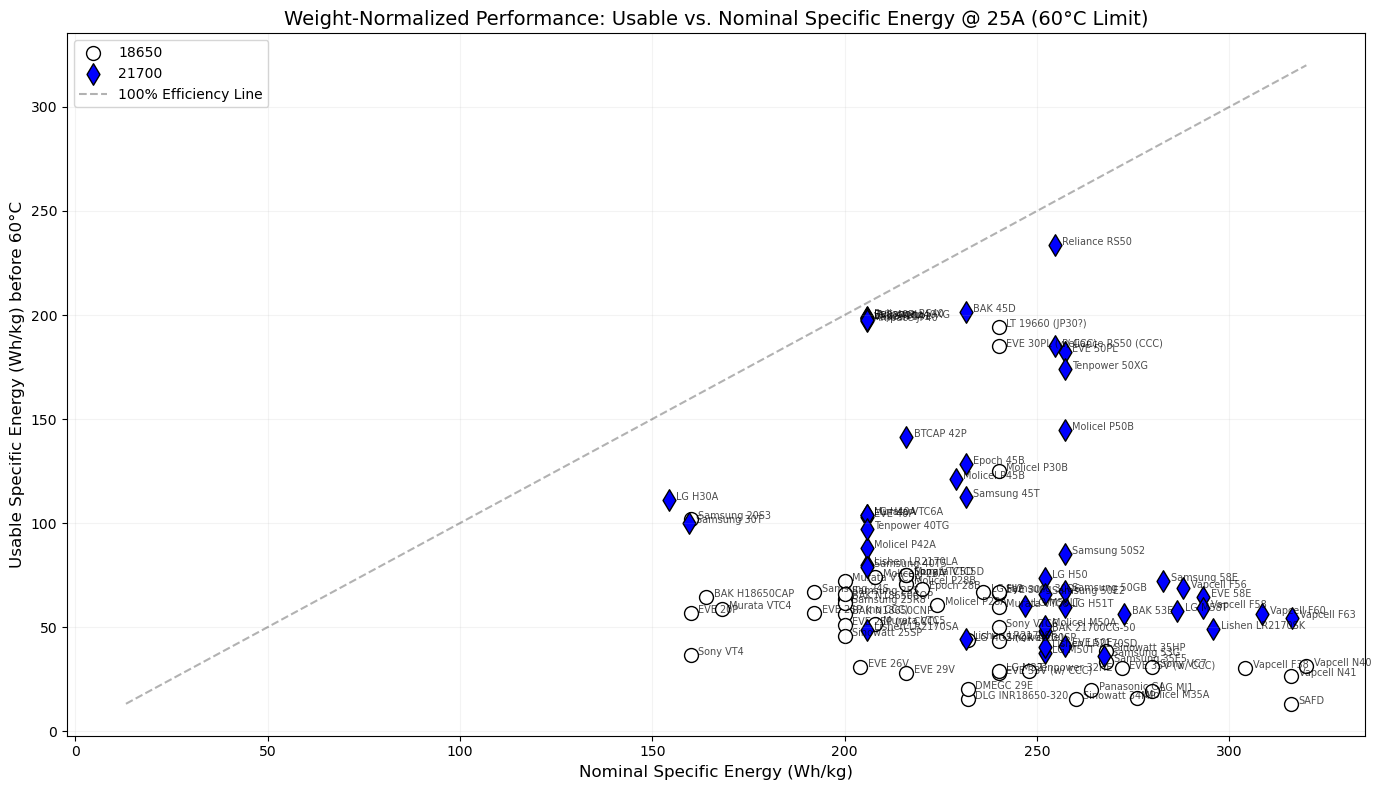

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and Clean Data
file_path = r'C:\Pythoning\Data\MoochBatteryDataV1.csv'
df = pd.read_csv(file_path, skipinitialspace=True)
df.columns = df.columns.str.strip()

# 2. Parameters & Constants
I_race = 25      # Amps
V_nom = 3.6      # Volts
T_rise = 35      # (60C - 25C)
c_p = 900        # J/kg*K

# Standard Cell Masses (kg)
MASS_18650 = 0.045    # 45g
MASS_21700 = 0.070    # 70g

# 3. Calculate Weight-Normalized Usable Metrics
plot_data = []

for i, row in df.iterrows():
    # Column matching for DC IR
    ir_col = 'DC IR (mohn)' if 'DC IR (mohn)' in df.columns else 'DC IR (mohm)'
    r_dc = row[ir_col] / 1000
    wh_nom = row['Est WH']
    size = int(row['Cell Size'])
    
    # Assign Mass
    m_kg = MASS_18650 if size == 18650 else MASS_21700
    
    # Thermal Limit Logic
    # Joule Limit = m * cp * deltaT
    joule_limit = m_kg * c_p * T_rise
    wh_thermal_limit = joule_limit / 3600
    
    # Predicted Energy Loss = (I * R * Wh_nom) / V_nom
    e_loss_predicted = (I_race * r_dc * wh_nom) / V_nom
    
    # Calculate Usable Wh before reaching 60°C
    if e_loss_predicted <= wh_thermal_limit:
        wh_usable = wh_nom - e_loss_predicted
    else:
        # Stop discharge early due to heat
        wh_usable = ((V_nom / (I_race * r_dc)) - 1) * wh_thermal_limit
    
    # WEIGHT NORMALIZATION
    nominal_specific_energy = wh_nom / m_kg   # Wh/kg (Nominal)
    usable_specific_energy = wh_usable / m_kg # Wh/kg (Usable @ 25A)
    
    plot_data.append({
        'Model': row['Battery Model'],
        'Size': size,
        'Nominal Wh/kg': nominal_specific_energy,
        'Usable Wh/kg': usable_specific_energy
    })

pdf = pd.DataFrame(plot_data)

# 4. Create the Plot
plt.figure(figsize=(14, 8))
d18 = pdf[pdf['Size'] == 18650]
d21 = pdf[pdf['Size'] == 21700]

plt.scatter(d18['Nominal Wh/kg'], d18['Usable Wh/kg'], c='white', edgecolors='black', marker='o', s=100, label='18650')
plt.scatter(d21['Nominal Wh/kg'], d21['Usable Wh/kg'], c='blue', edgecolors='black', marker='d', s=120, label='21700')

# Reference Diagonal Line (100% Efficiency)
lims = [min(pdf['Nominal Wh/kg'].min(), pdf['Usable Wh/kg'].min()), 
        max(pdf['Nominal Wh/kg'].max(), pdf['Usable Wh/kg'].max())]
plt.plot(lims, lims, 'k--', alpha=0.3, label='100% Efficiency Line')

# Labels
for i, row in pdf.iterrows():
    plt.text(row['Nominal Wh/kg'] + 2, row['Usable Wh/kg'], row['Model'], fontsize=7, alpha=0.7)

plt.title(f'Weight-Normalized Performance: Usable vs. Nominal Specific Energy @ {I_race}A (60°C Limit)', fontsize=14)
plt.xlabel('Nominal Specific Energy (Wh/kg)', fontsize=12)
plt.ylabel('Usable Specific Energy (Wh/kg) before 60°C', fontsize=12)
plt.grid(True, alpha=0.15)
plt.legend()
plt.tight_layout()
plt.show()

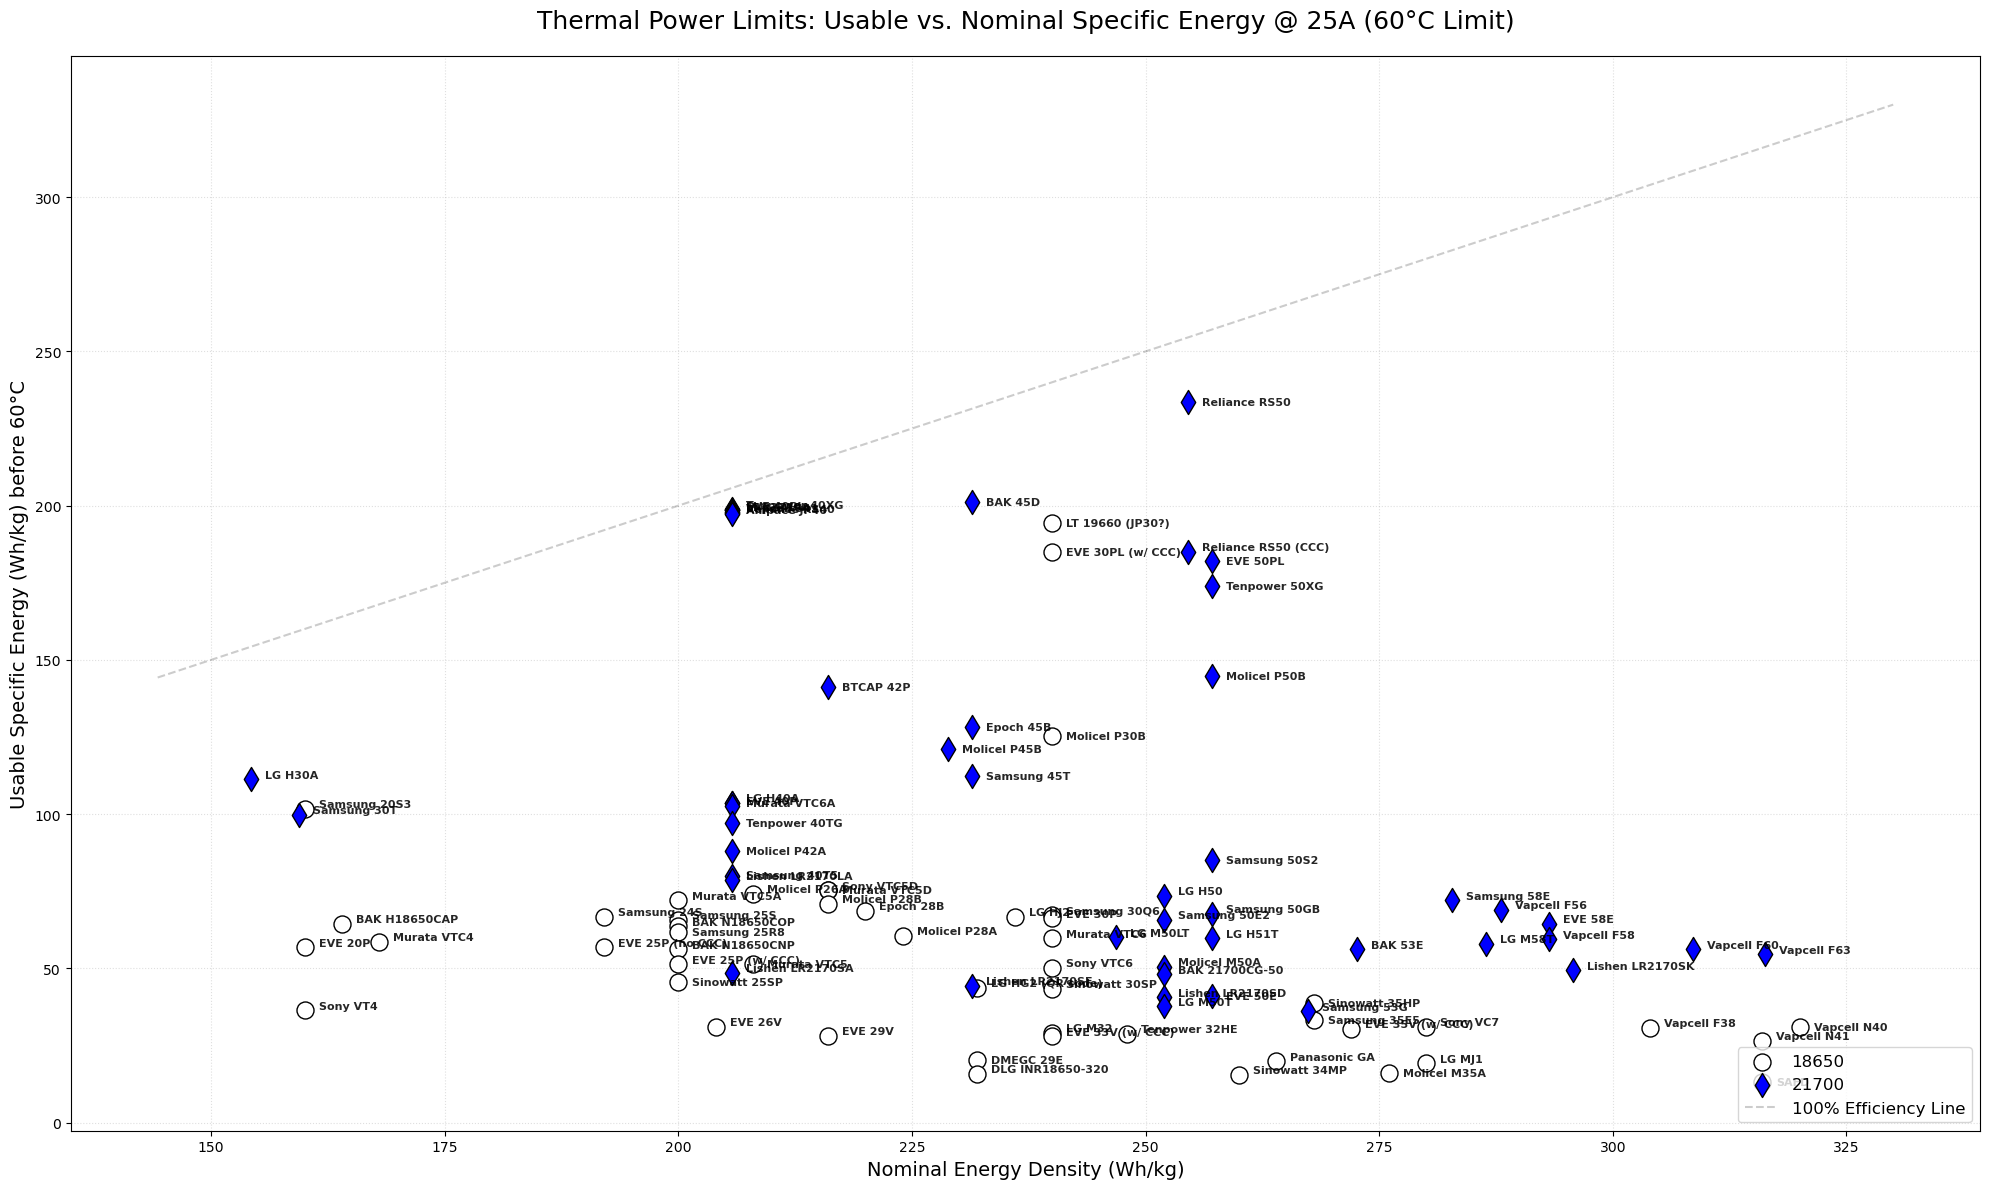

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. Load and Clean Data
file_path = r'C:\Pythoning\Data\MoochBatteryDataV1.csv'
df = pd.read_csv(file_path, skipinitialspace=True)
df.columns = df.columns.str.strip()

# 2. Parameters & Constants
I_race = 25      # Sustained Amps
V_nom = 3.6      
T_rise = 35      # (60C - 25C Target)
c_p = 900        # J/kg*K
MASS_18650 = 0.045
MASS_21700 = 0.070

# 3. Calculate Weight-Normalized Performance
results = []
for i, row in df.iterrows():
    ir_col = 'DC IR (mohn)' if 'DC IR (mohn)' in df.columns else 'DC IR (mohm)'
    r_dc = row[ir_col] / 1000
    wh_nom = row['Est WH']
    size = int(row['Cell Size'])
    m_kg = MASS_18650 if size == 18650 else MASS_21700
    
    # Thermal Energy Limit (Joules)
    wh_thermal_limit = (m_kg * c_p * T_rise) / 3600
    e_loss_predicted = (I_race * r_dc * wh_nom) / V_nom
    
    # Calculate Usable Energy before 60C
    if e_loss_predicted <= wh_thermal_limit:
        wh_usable = wh_nom - e_loss_predicted
    else:
        wh_usable = ((V_nom / (I_race * r_dc)) - 1) * wh_thermal_limit
    
    results.append({
        'Model': row['Battery Model'],
        'Size': size,
        'Nominal Wh/kg': wh_nom / m_kg,
        'Usable Wh/kg': wh_usable / m_kg,
        'Efficiency %': (wh_usable / wh_nom) * 100
    })

pdf = pd.DataFrame(results).sort_values(by='Usable Wh/kg', ascending=False)

# 4. Export Ranked CSV
output_dir = r'C:\Pythoning\Outputs'
if not os.path.exists(output_dir): os.makedirs(output_dir)
pdf.to_csv(os.path.join(output_dir, 'Thermal_Performance_Rankings.csv'), index=False)

# 5. Create High-Resolution Plot
plt.figure(figsize=(20, 12)) # Large canvas for more label space
plt.rcParams['figure.dpi'] = 300

# Scatter plot
for size, color, marker, label in [(18650, 'white', 'o', '18650'), (21700, 'blue', 'd', '21700')]:
    sub = pdf[pdf['Size'] == size]
    plt.scatter(sub['Nominal Wh/kg'], sub['Usable Wh/kg'], c=color, edgecolors='black', 
                marker=marker, s=150, label=label, zorder=3)

# 6. Advanced Labeling (Overlap Prevention)
# We sort points by Usable Wh/kg and track label heights to avoid collisions
last_y = -100
for i, row in pdf.iterrows():
    curr_x = row['Nominal Wh/kg']
    curr_y = row['Usable Wh/kg']
    
    # If the point is too close to the previous one vertically, offset the label
    y_offset = 0
    if abs(curr_y - last_y) < 2:
        y_offset = 1.5  # Move label up slightly if it overlaps
    
    plt.text(curr_x + 1.5, curr_y + y_offset, row['Model'], 
             fontsize=8, verticalalignment='center', fontweight='bold', alpha=0.85)
    last_y = curr_y

# 7. Formatting & High-Res Save
plt.title(f'Thermal Power Limits: Usable vs. Nominal Specific Energy @ {I_race}A (60°C Limit)', fontsize=18, pad=20)
plt.xlabel('Nominal Energy Density (Wh/kg)', fontsize=14)
plt.ylabel('Usable Specific Energy (Wh/kg) before 60°C', fontsize=14)

# Reference Efficiency Lines
lims = [pdf['Nominal Wh/kg'].min()-10, pdf['Nominal Wh/kg'].max()+10]
plt.plot(lims, lims, 'k--', alpha=0.2, label='100% Efficiency Line')

plt.grid(True, linestyle=':', alpha=0.4)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()

# Save as High Resolution PNG
plt.savefig(os.path.join(output_dir, 'HighRes_Thermal_Map.png'), dpi=300)
plt.show()